In [72]:
# Display all cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
from pathlib import Path
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import dexplot as dxp
from dateutil import parser


# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')


import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='####',api_key='###')

import plotly.plotly as py
import plotly.graph_objs as go

# Offline mode
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [73]:
from bnb.data_processing.read import read_csvfile
from bnb.data_analysis.analyze import group_by_date

## Reading Data

In [74]:
Data_dir = Path('C:/Users/KBrig/AirBnBRepo/AirBnB/data')
Data_dir

WindowsPath('C:/Users/KBrig/AirBnBRepo/AirBnB/data')

In [75]:
NewYork_CSV = Data_dir/'NewYorkData_clean.csv'
Bangkok_CSV = Data_dir/'BangkokData_clean.csv'
Cairo_CSV = Data_dir/'CairoData_clean.csv'


### NewYork

In [76]:
NewYorkData = read_csvfile(NewYork_CSV)
NewYorkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Columns: 109 entries, Accuracy_stars to Title
dtypes: float64(12), int64(94), object(3)
memory usage: 3.3+ MB


In [77]:
NewYorkData['normalized_price']=NewYorkData['Price']/NewYorkData['Price'][0]

In [78]:
NewYorkData['CheckIn']=NewYorkData['CheckIn'].apply(parser.parse)
NewYorkData['CheckOut']=NewYorkData['CheckOut'].apply(parser.parse)

In [140]:
NewYorkData.head()

index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0   3956             5.0 2020-02-06            5.0 2020-02-11   
1   2961             5.0 2019-08-22            5.0 2019-08-27   
2    924             5.0 2019-09-05            5.0 2019-09-10   
3    930             5.0 2019-09-05            5.0 2019-09-10   
4   2954             5.0 2019-08-22            4.5 2019-08-27   

   Cleanliness_stars  Communication_stars  Latitude  Location_stars  \
0                5.0                  5.0  40.68942             5.0   
1                5.0                  5.0  40.71320             5.0   
2                5.0                  5.0  40.72505             5.0   
3                5.0                  5.0  40.74101             5.0   
4                5.0                  4.5  40.75347             5.0   

   Longitude          ...           Reviewers_no  \
0  -73.95455          ...                      8   
1  -73.94371          ...                     35   
2  -73.94449          ...                     78   
3  -73.99471          ...                      3   
4  -73.98567          ...                     99   

                                             Title  normalized_price  \
0         Comfort room a minute to G train station          0.647541   
1            New York Williamsburg tranquil studio          0.631148   
2         Super Cute Studio in Heart of Greenpoint          0.565574   
3  Super Luxury! Alcove Studio in heart of Chelsea          1.057377   
4                       Time Square Private Studio          0.995902   

   Group_ID  AccuracyStars_interval  LocationStars_interval  \
0        -1                       5                       5   
1        -1                       5                       5   
2        -1                       5                       5   
3        -1                       5                       5   
4        -1                       5                       5   

   CheckInStars_interval  ValueStars_interval  CommunicationStars_interval  \
0                      5                    5                            5   
1                      5                  4.5                            5   
2                      5                  4.5                            5   
3                      5                    5                            5   
4                    4.5                  4.5                          4.5   

   CleanlStars_interval  
0                     5  
1                     5  
2                     5  
3                     5  
4                     5  

[5 rows x 118 columns]

### Bangkok

In [8]:
BangkokData = read_csvfile(Bangkok_CSV)
BangkokData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7751 entries, 0 to 7750
Columns: 107 entries, CheckIn to Title
dtypes: float64(11), int64(93), object(3)
memory usage: 6.3+ MB


### Cairo

In [9]:
CairoData = read_csvfile(Cairo_CSV)
CairoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902 entries, 0 to 7901
Columns: 108 entries, CheckIn to Title
dtypes: float64(11), int64(94), object(3)
memory usage: 6.5+ MB


## Numeric Data Analysis

### NewYork

In [8]:
list(set(NewYorkData.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [9]:
NewYorkData_num = NewYorkData.select_dtypes(include = ['float64', 'int64'])

Let's check the distribution of all numeric features we have! 

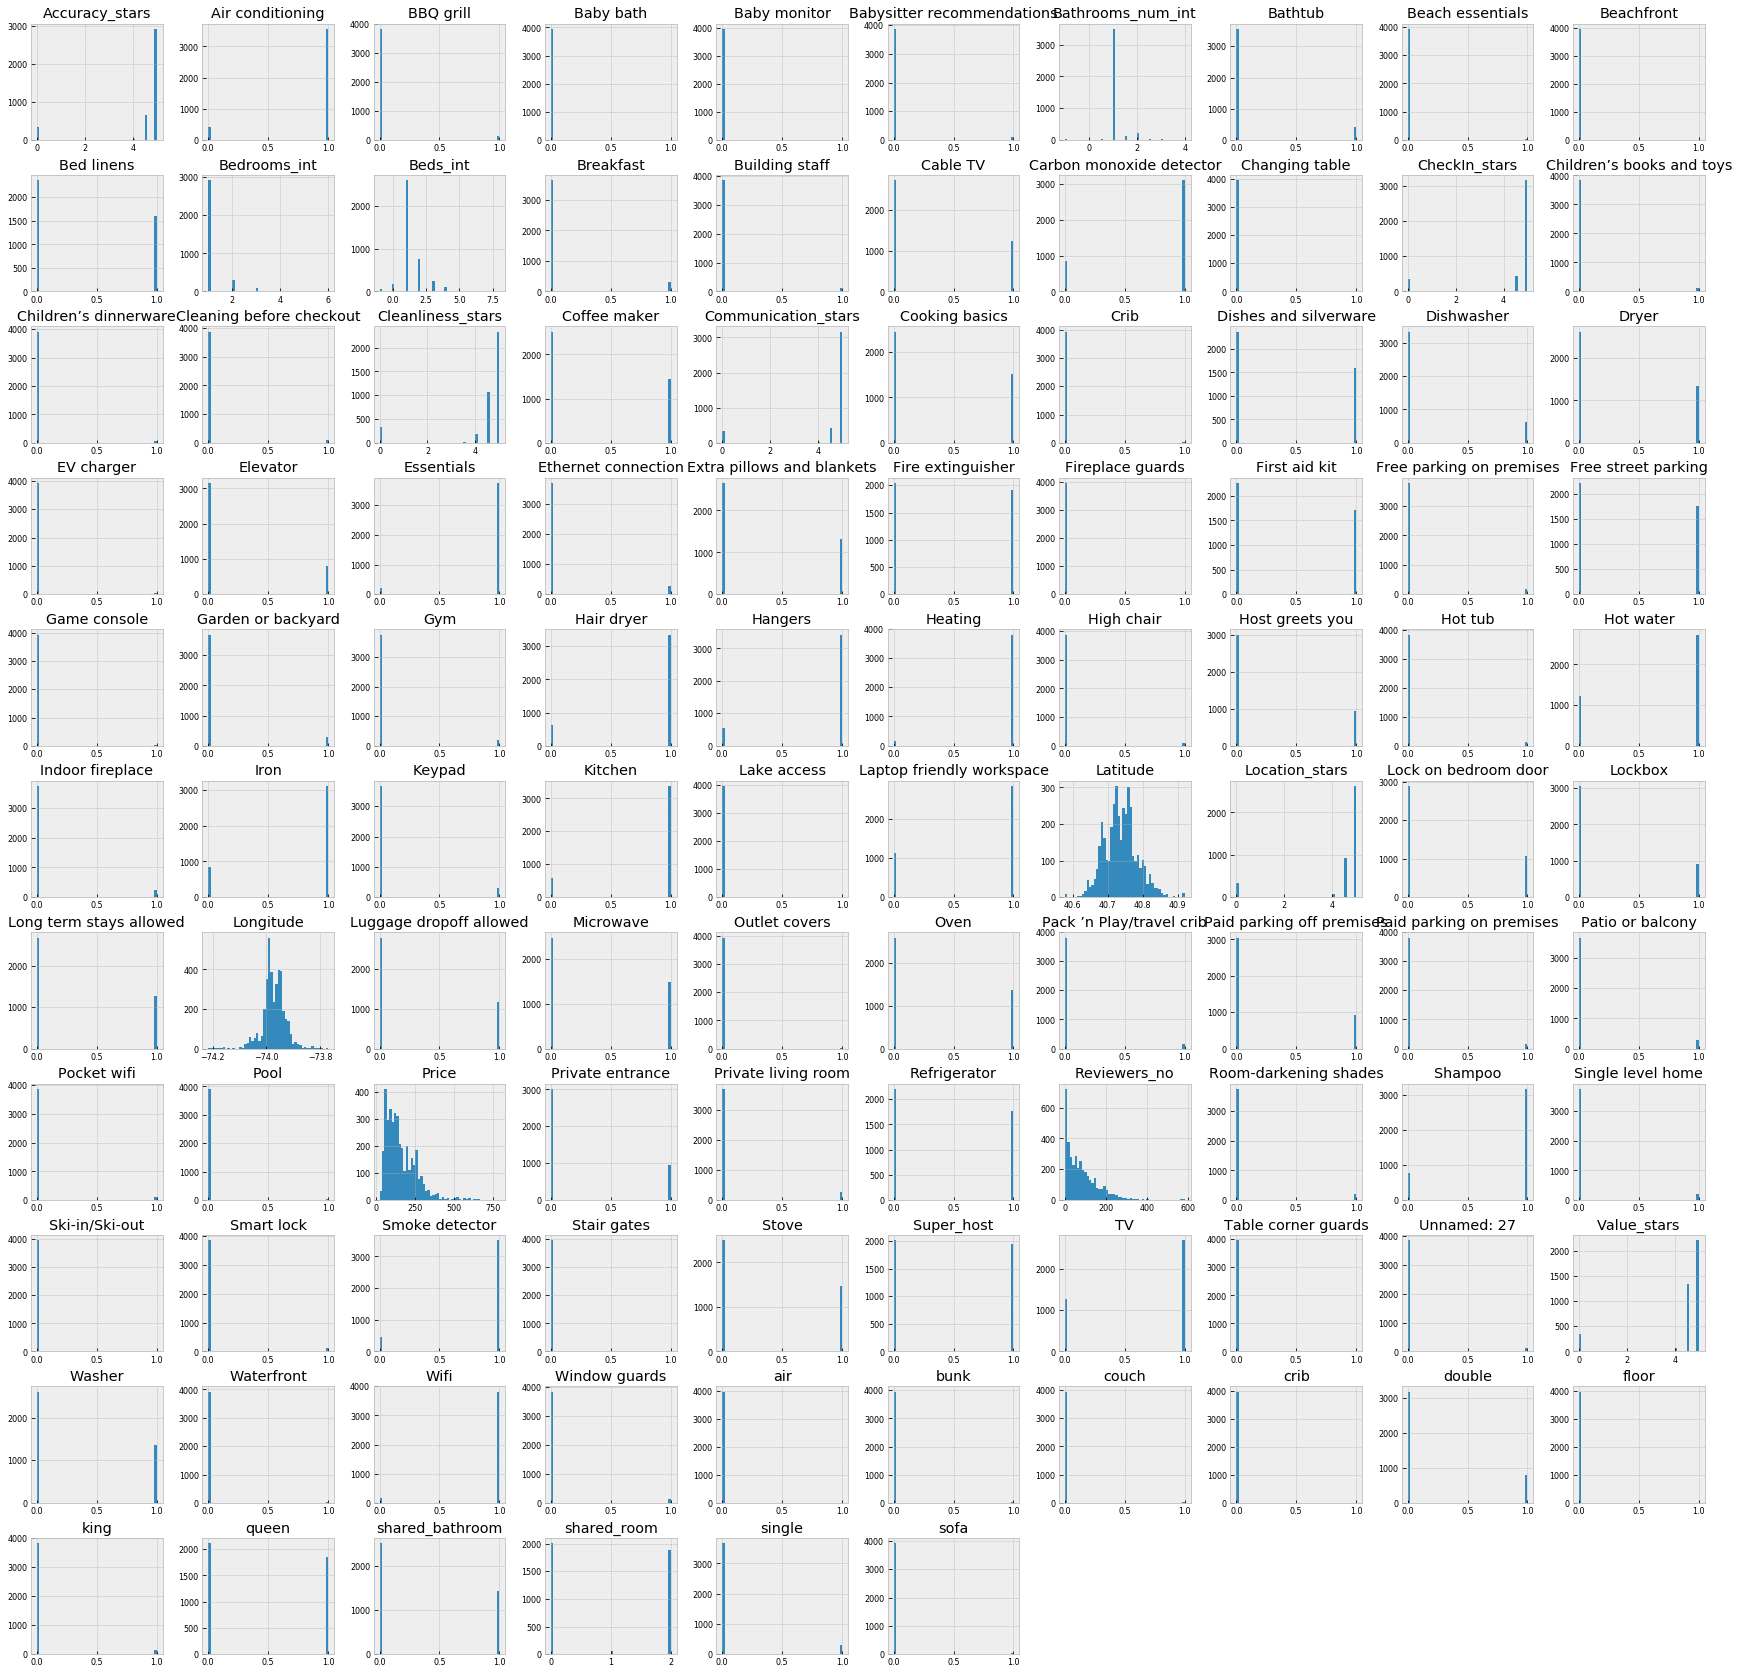

In [10]:
NewYorkData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

### Bangkok

In [11]:
list(set(BangkokData.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [12]:
BangkokData_num = BangkokData.select_dtypes(include = ['float64', 'int64'])

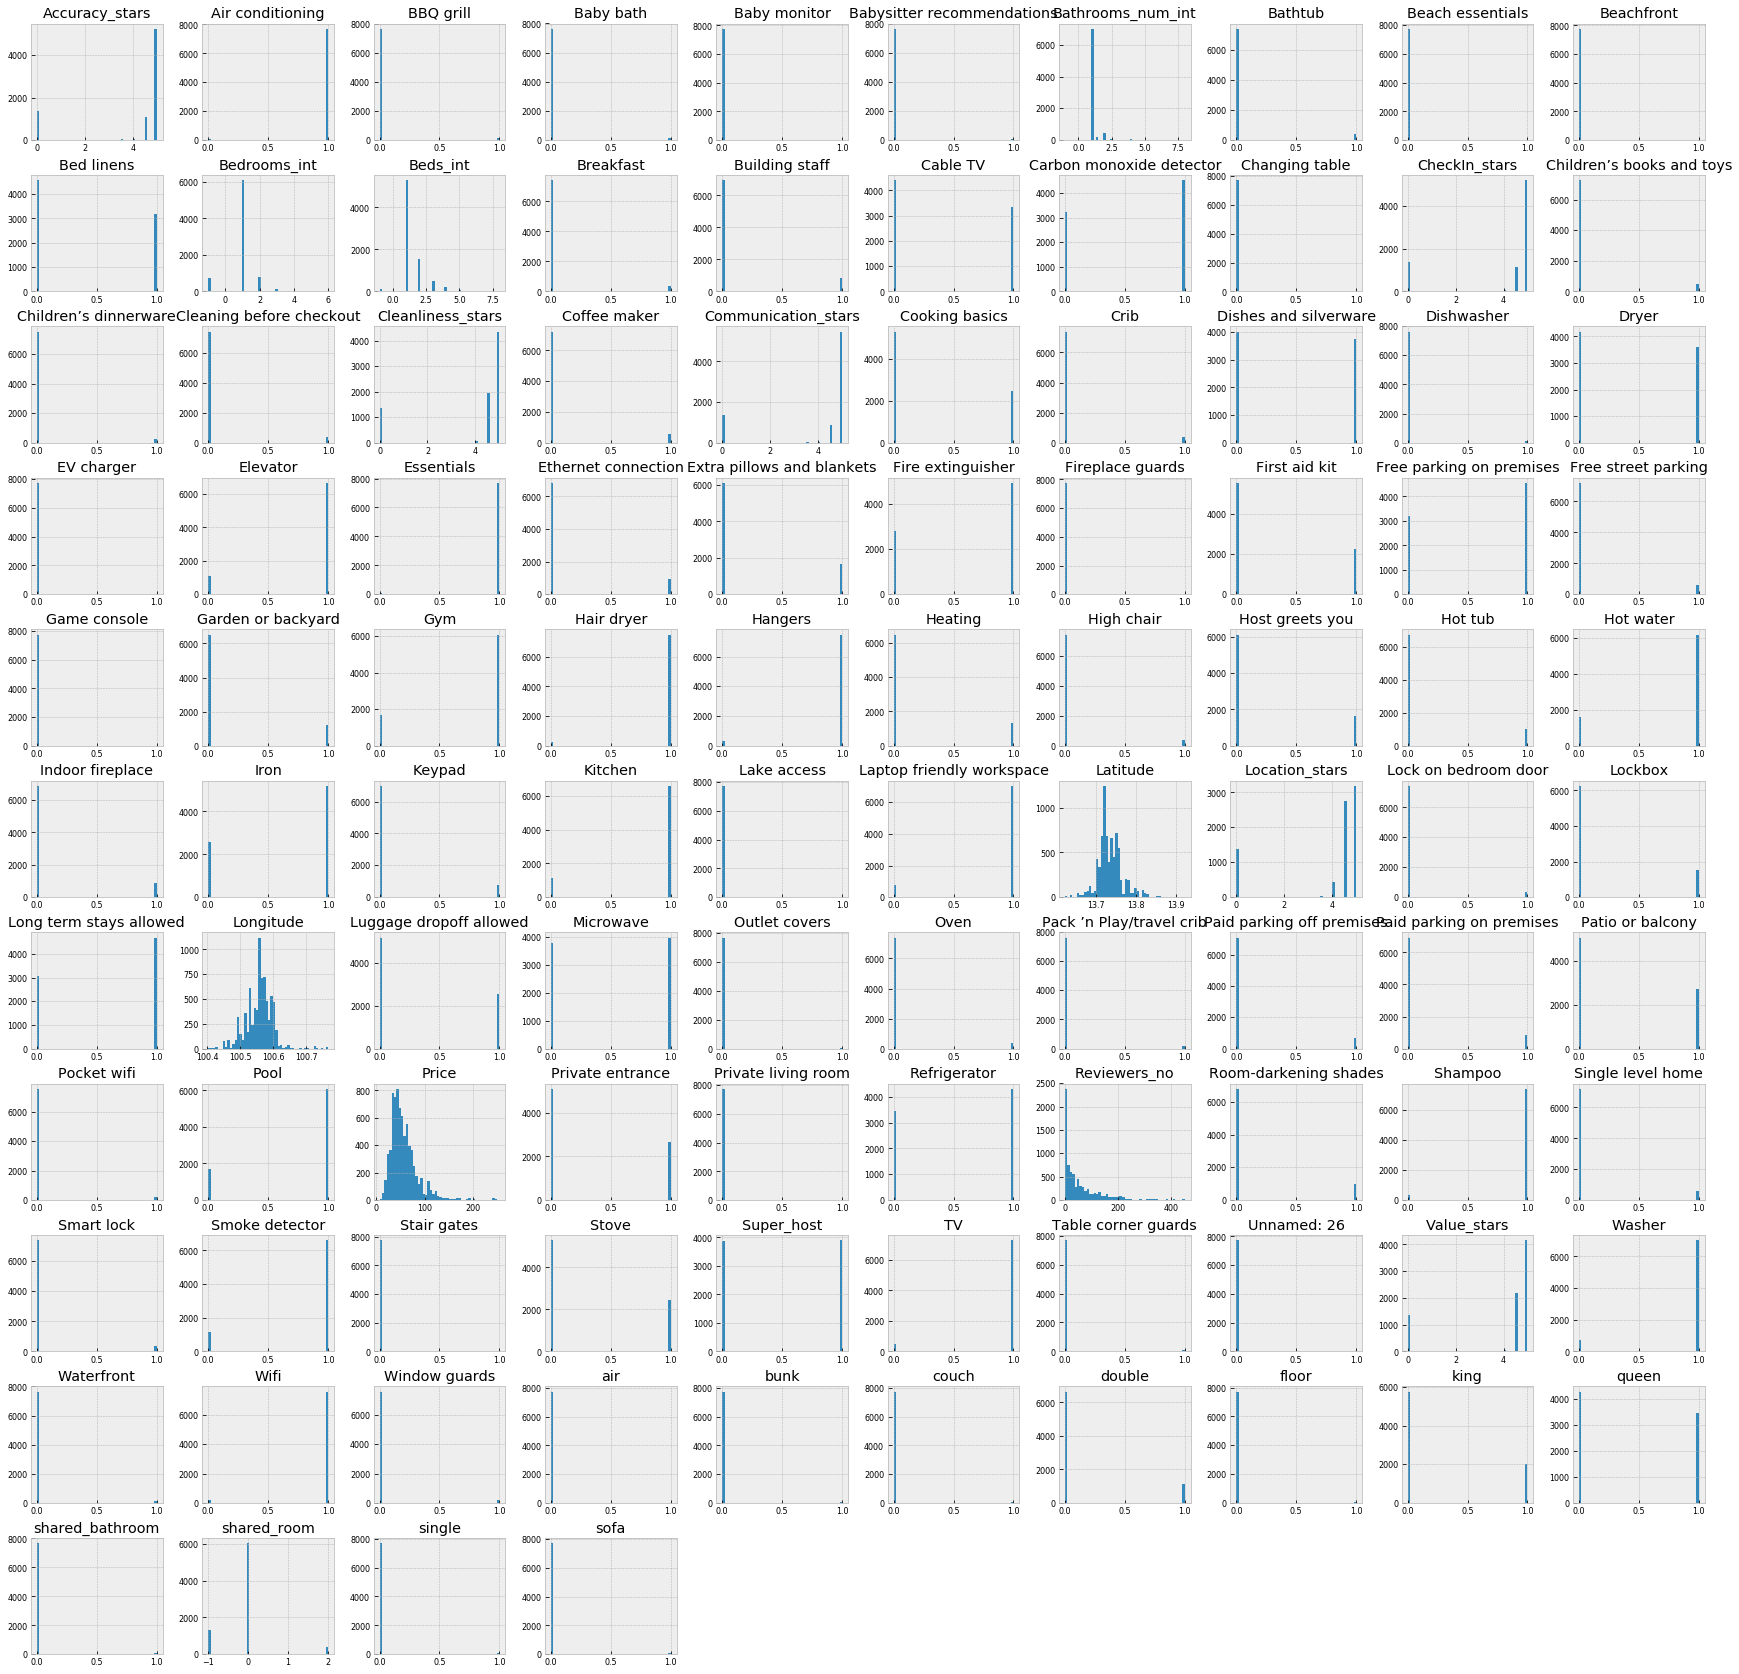

In [13]:
BangkokData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

### Cairo

In [14]:
list(set(CairoData.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [15]:
CairoData_num = CairoData.select_dtypes(include = ['float64', 'int64'])

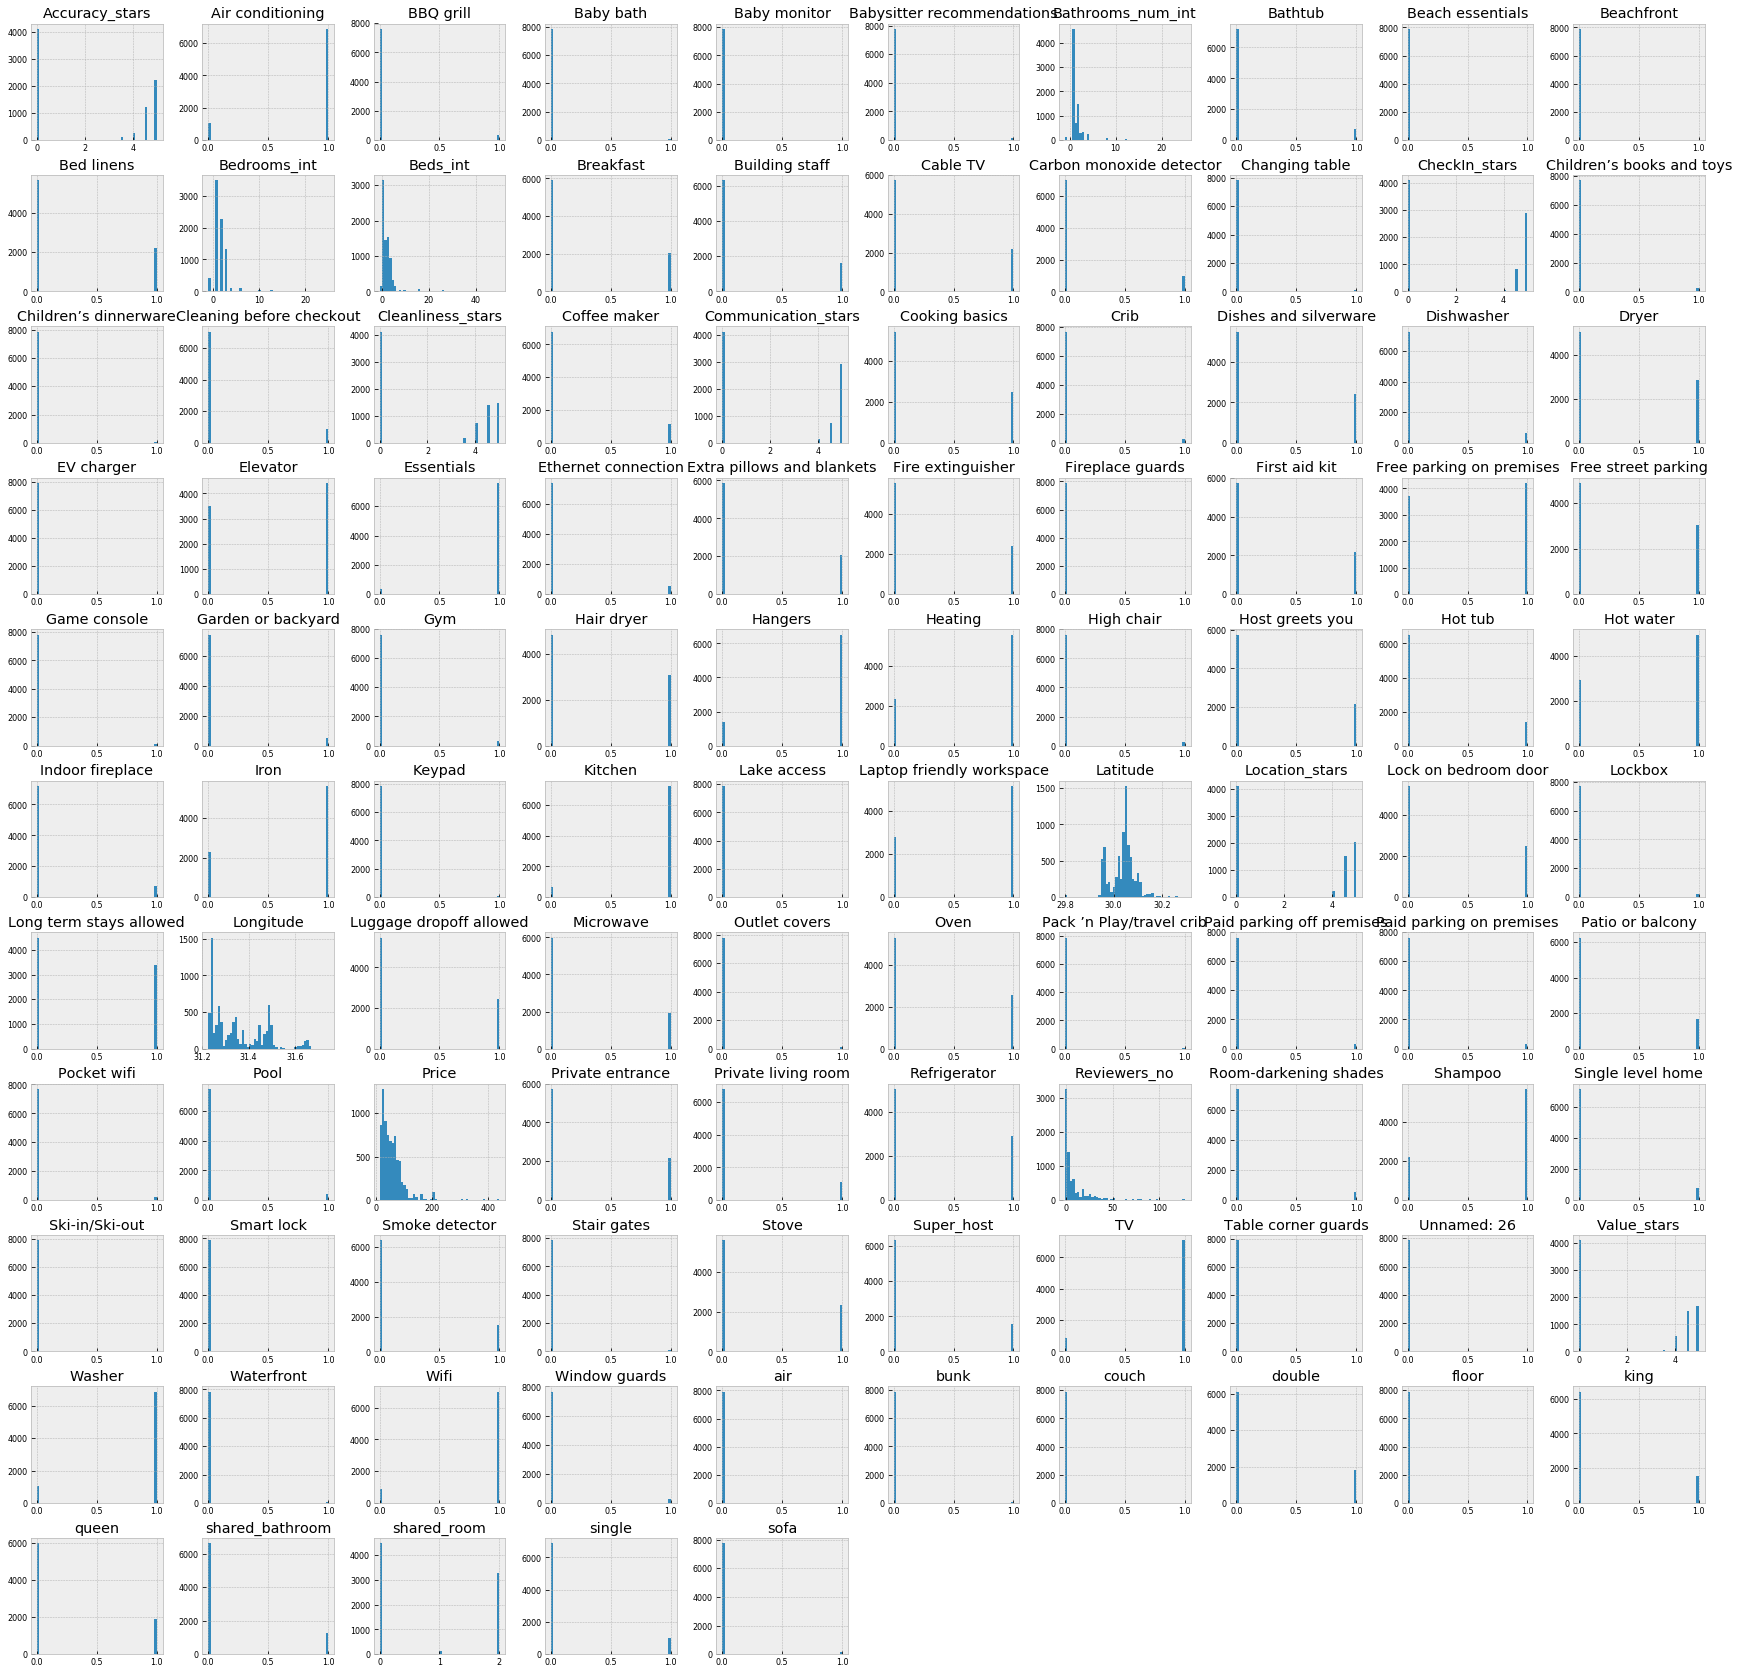

In [16]:
CairoData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

As we see, most of the variables here are either binary such as the bed type : king, queen, double,etc or numeric with limited number of vlaues such as the review stars.

That was the individual distribution of different varibales. Let's explore some connections between those variables!


### NewYork

In [17]:
NewYorkData_corr=NewYorkData_num.corr()
NewYorkData_corr

Accuracy_stars  CheckIn_stars  Cleanliness_stars  \
Accuracy_stars                   1.000000       0.989600           0.982387   
CheckIn_stars                    0.989600       1.000000           0.977963   
Cleanliness_stars                0.982387       0.977963           1.000000   
Communication_stars              0.991665       0.993819           0.978238   
Latitude                        -0.009371      -0.005990          -0.010288   
Location_stars                   0.980151       0.980580           0.966495   
Longitude                        0.066078       0.063670           0.067868   
Price                            0.024116       0.010759           0.040625   
Super_host                       0.294117       0.273178           0.324036   
Value_stars                      0.986770       0.984248           0.978635   
Bathrooms_num_int               -0.005688      -0.007356          -0.002326   
shared_bathroom                  0.012266       0.020918           0.000974   
Bedrooms_int                    -0.062711      -0.060554          -0.044978   
Beds_int                        -0.025103      -0.023504          -0.015426   
shared_room                     -0.000229       0.007893          -0.010956   
air                              0.009203       0.011278           0.014515   
bunk                            -0.037237      -0.034260          -0.029982   
couch                            0.020267       0.024211           0.021518   
crib                             0.008521       0.007973           0.010261   
double                          -0.010050      -0.000939          -0.018790   
floor                           -0.025765      -0.023003          -0.023962   
king                            -0.007742      -0.006443          -0.005179   
queen                           -0.034206      -0.046305          -0.028282   
single                           0.025104       0.023675           0.030028   
sofa                             0.016264       0.018240           0.023179   
Unnamed: 27                     -0.038521      -0.037990          -0.038047   
Air conditioning                 0.058400       0.053574           0.054580   
BBQ grill                        0.007839       0.005592           0.015030   
Baby bath                       -0.032955      -0.034260          -0.029982   
Baby monitor                     0.015951       0.014926           0.019209   
...                                   ...            ...                ...   
Lockbox                          0.073216       0.064356           0.074236   
Long term stays allowed          0.068397       0.062487           0.075917   
Luggage dropoff allowed          0.111606       0.107720           0.116865   
Microwave                        0.041150       0.034105           0.058809   
Outlet covers                    0.003898       0.005284           0.007842   
Oven                             0.018851       0.016328           0.029959   
Pack ’n Play/travel crib         0.054671       0.051790           0.062262   
Paid parking off premises        0.081579       0.072663           0.079505   
Paid parking on premises         0.037268       0.035900           0.044147   
Patio or balcony                 0.033101       0.034700           0.042219   
Pocket wifi                     -0.057554      -0.059016          -0.054552   
Pool                             0.004750      -0.005972           0.006461   
Private entrance                -0.040240      -0.042494          -0.022795   
Private living room             -0.079612      -0.080762          -0.083882   
Refrigerator                     0.064247       0.063250           0.083670   
Room-darkening shades            0.063307       0.059125           0.071721   
Shampoo                          0.069827       0.059683           0.077296   
Single level home                0.022332       0.022593           0.030400   
Ski-in/Ski-out                   0.010110       0.009181           0.013084  

In [18]:
NewYorkData_corr['Price'][abs(NewYorkData_corr['Price']) > 0.5]


Price              1.000000
shared_bathroom   -0.511981
Bedrooms_int       0.527266
shared_room       -0.633473
Name: Price, dtype: float64

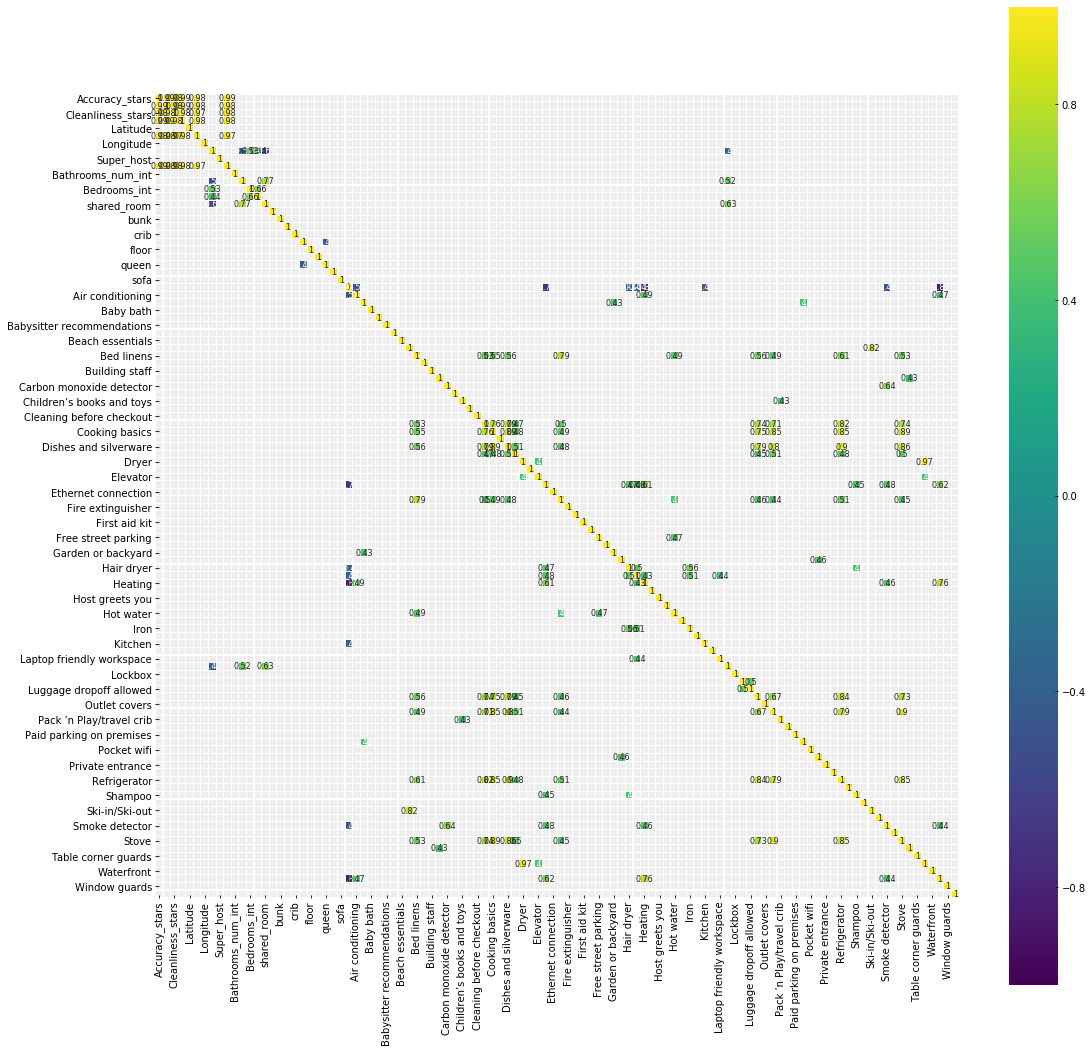

In [19]:
plt.figure(figsize=(18, 18))
sns.heatmap(NewYorkData_corr[abs(NewYorkData_corr) >= 0.4], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### Let's zoom it out!!

In [20]:
valuable_feats_NY = NewYorkData_corr['Price'][abs(NewYorkData_corr['Price']) > 0.4]
valuable_feats_NY

Price                   1.000000
shared_bathroom        -0.511981
Bedrooms_int            0.527266
Beds_int                0.436899
shared_room            -0.633473
Lock on bedroom door   -0.417873
Name: Price, dtype: float64

It seems that we have a pretty clear correlation between the average price and the parameters charactarizing the size of the apartment/house and the sharing/privacy of those properties.

In [21]:
NewYorkData_size= NewYorkData[['Price','Bedrooms_int','Beds_int','Bathrooms_num_int']]

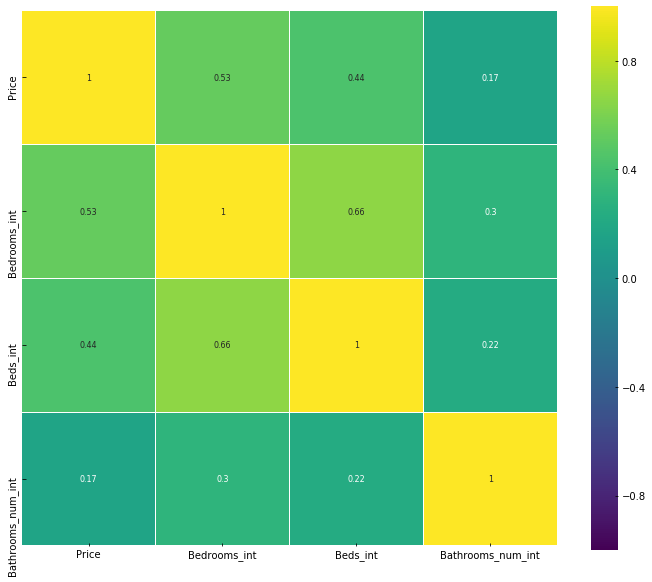

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(NewYorkData_size.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

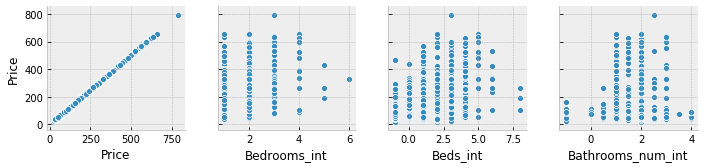

In [23]:
sns.pairplot(data=NewYorkData_size, x_vars=NewYorkData_size.columns,y_vars=['Price'])

### Can sharing a room or bathroom affect the correponding price?

In [24]:
NewYorkData_sharing = NewYorkData[['Price','shared_room','shared_bathroom', 'Super_host']]

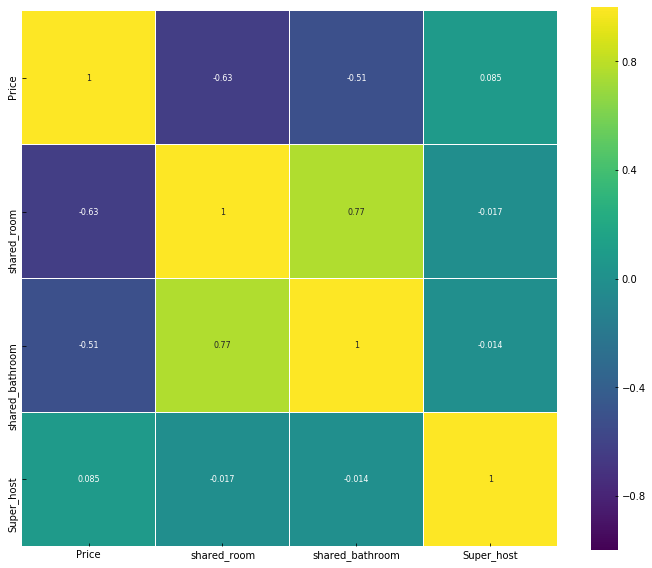

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(NewYorkData_sharing.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### What's about the reviews' history?

In [27]:
NewYorkData_review = NewYorkData[['Price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]

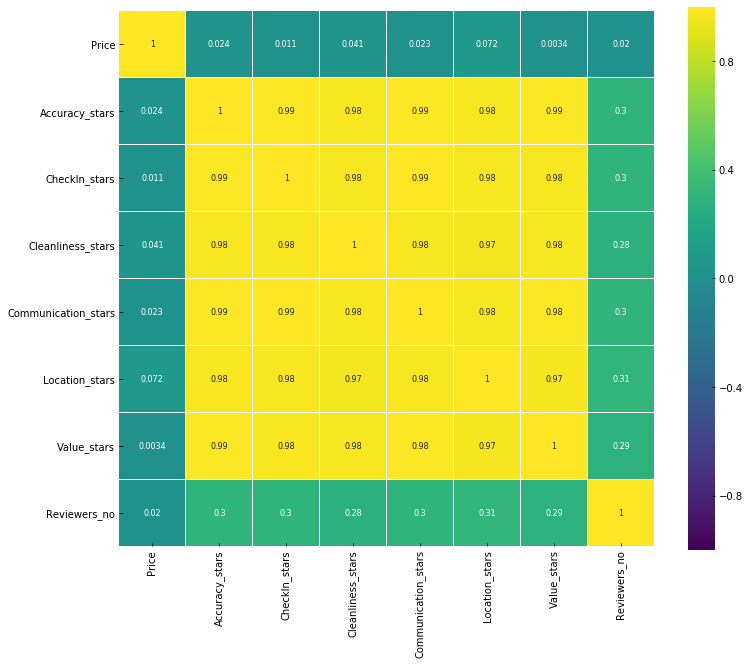

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(NewYorkData_review.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### Price vs. Bed Type

In [29]:
NewYorkData_BedType = NewYorkData[['Price','air', 'bunk', 'couch', 'crib', 'double', 'floor', 'king', 'queen','single', 'sofa']]

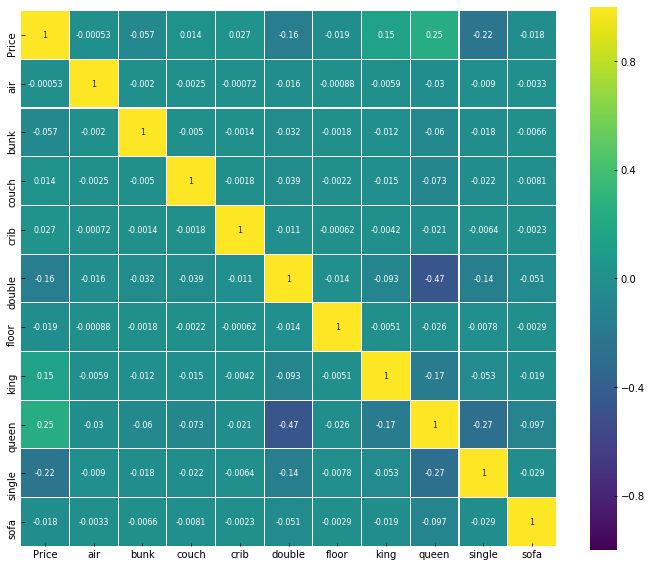

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(NewYorkData_BedType.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### Price vs. available amenities

In [37]:
NewYork_amenities_list = NewYorkData.columns[-80:-1]

In [38]:
NewYorkData_amenities = NewYorkData[NewYork_amenities_list]
NewYorkData_amenities['Price'] = NewYorkData['Price']

In [39]:
NewYorkData_amenities.corr()['Price'][abs(NewYorkData_amenities.corr()['Price']) > 0.2]

Cable TV                0.215435
Lock on bedroom door   -0.417873
TV                      0.279330
Price                   1.000000
Name: Price, dtype: float64

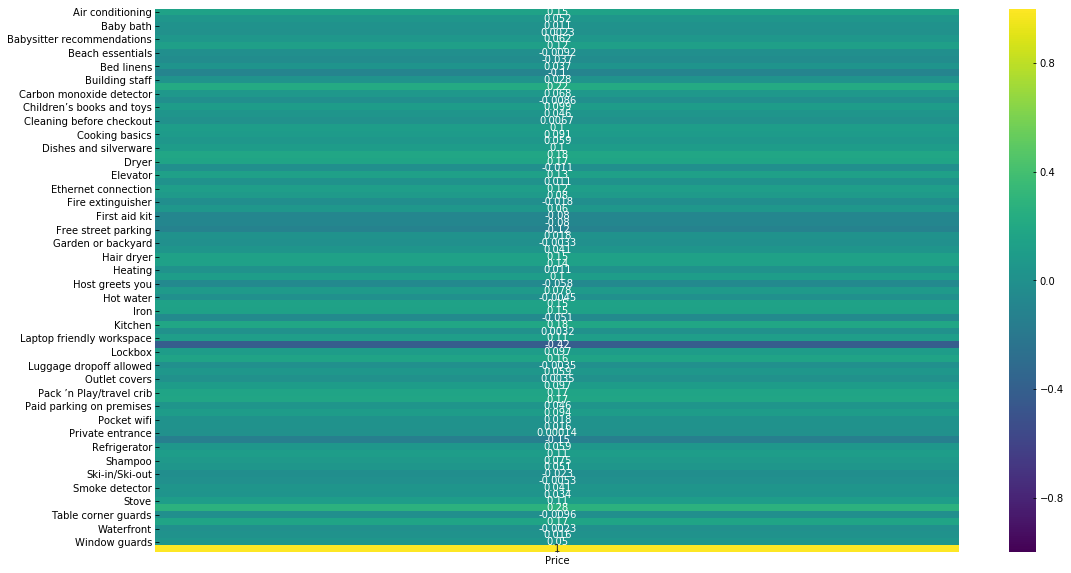

In [40]:
plt.figure(figsize=(18,10))
sns.heatmap(NewYorkData_amenities.corr()[['Price']],vmax=1.0, vmin=-1.0, cmap='viridis', annot=True);

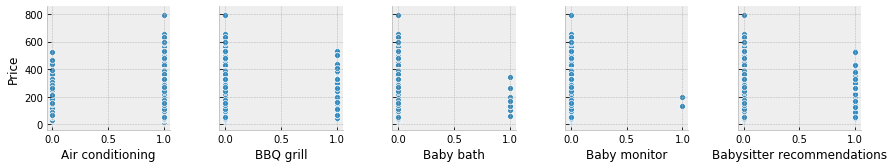

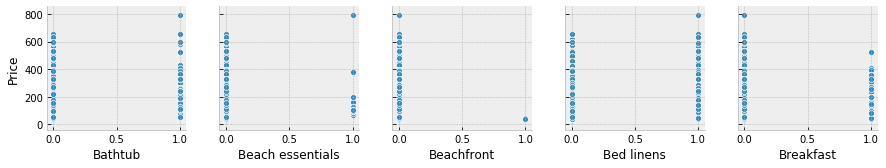

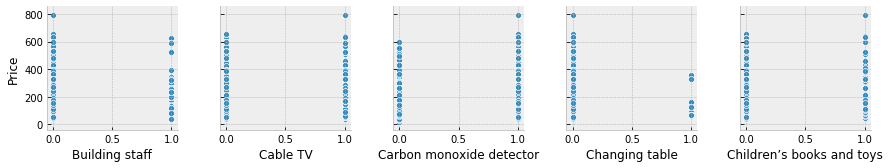

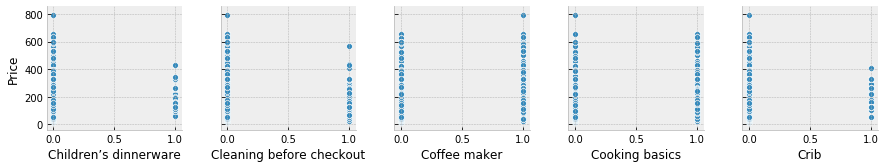

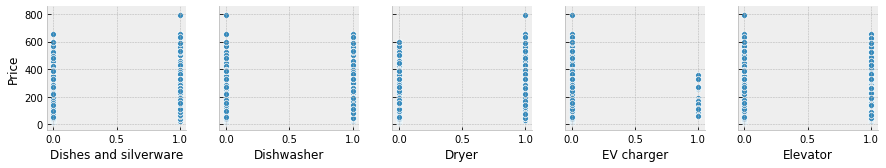

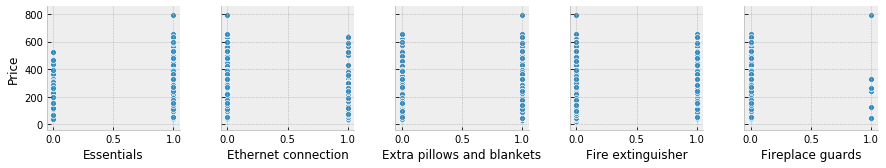

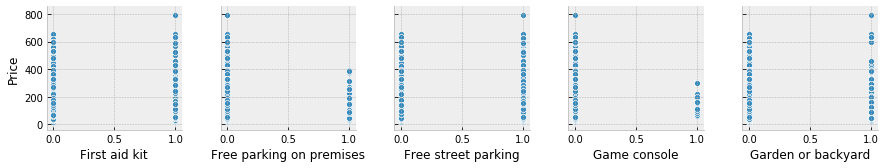

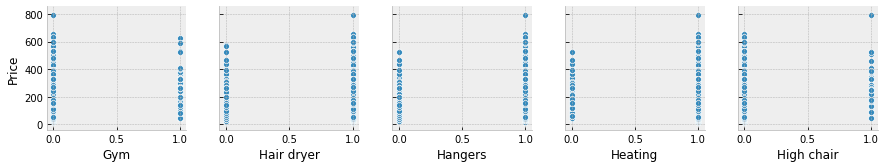

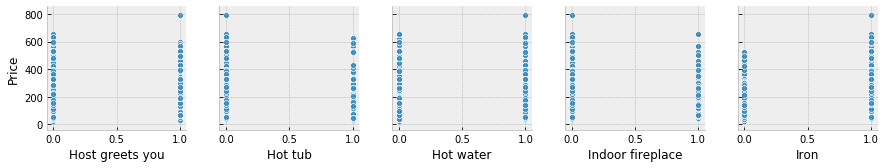

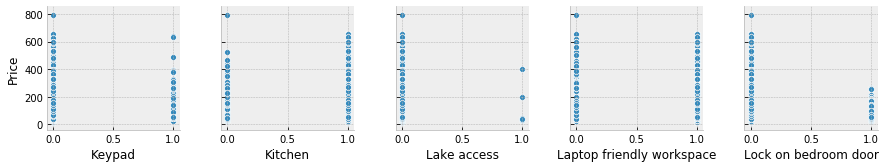

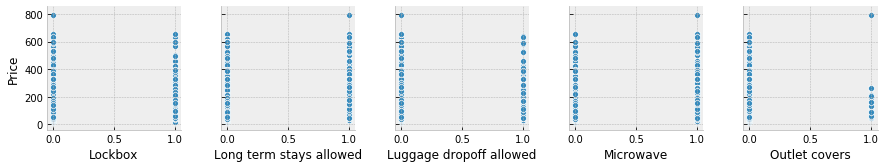

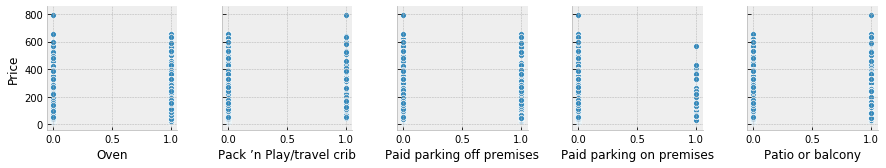

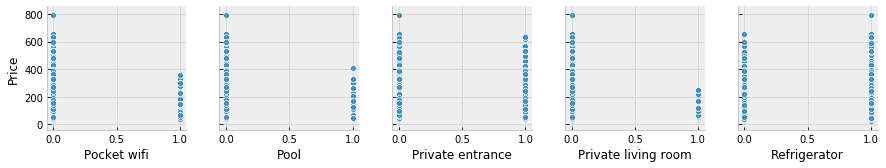

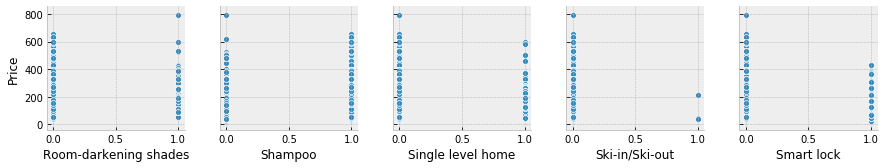

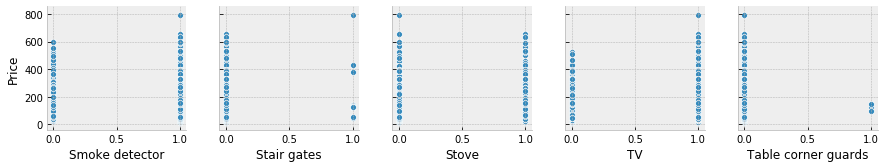

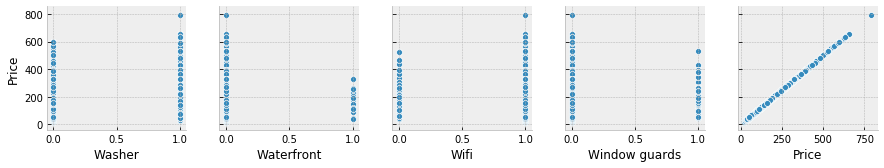

In [41]:

for i in range(0, len(NewYorkData_amenities.columns), 5):
    sns.pairplot(data=NewYorkData_amenities,x_vars= NewYorkData_amenities.columns[i:i+5],y_vars=['Price'])

### Price Distribution

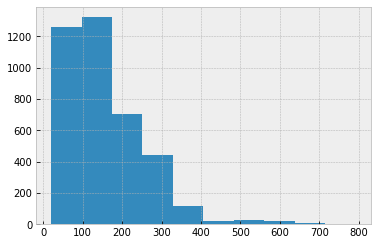

In [44]:
NewYorkData['Price'].hist()

let's check the outliers!

In [56]:
NewYorkData[NewYorkData.Price > 500]

Accuracy_stars              CheckIn  CheckIn_stars             CheckOut  \
515              5.0  2019-06-13 00:00:00            5.0  2019-06-18 00:00:00   
549              0.0  2019-06-13 00:00:00            0.0  2019-06-18 00:00:00   
703              5.0  2019-07-11 00:00:00            5.0  2019-07-16 00:00:00   
927              4.5  2019-09-05 00:00:00            4.5  2019-09-10 00:00:00   
967              5.0  2019-09-05 00:00:00            5.0  2019-09-10 00:00:00   
1044             5.0  2019-09-05 00:00:00            5.0  2019-09-10 00:00:00   
1064             4.5  2019-10-03 00:00:00            4.5  2019-10-08 00:00:00   
1187             5.0  2019-10-03 00:00:00            5.0  2019-10-08 00:00:00   
1197             0.0  2019-10-03 00:00:00            0.0  2019-10-08 00:00:00   
1204             5.0  2019-10-03 00:00:00            4.5  2019-10-08 00:00:00   
1211             5.0  2019-10-03 00:00:00            4.5  2019-10-08 00:00:00   
1302             5.0  2019-10-31 00:00:00            5.0  2019-11-05 00:00:00   
1415             5.0  2019-11-28 00:00:00            5.0  2019-12-03 00:00:00   
1468             5.0  2019-11-28 00:00:00            4.5  2019-12-03 00:00:00   
1472             5.0  2019-11-28 00:00:00            5.0  2019-12-03 00:00:00   
1626             5.0  2019-12-26 00:00:00            5.0  2019-12-31 00:00:00   
1656             4.5  2019-12-26 00:00:00            5.0  2019-12-31 00:00:00   
1664             5.0  2019-12-26 00:00:00            5.0  2019-12-31 00:00:00   
1750             5.0  2020-01-23 00:00:00            5.0  2020-01-28 00:00:00   
1805             4.5  2020-01-23 00:00:00            5.0  2020-01-28 00:00:00   
1817             4.5  2020-01-23 00:00:00            4.5  2020-01-28 00:00:00   
1876             5.0  2020-02-20 00:00:00            5.0  2020-02-25 00:00:00   
1893             5.0  2020-02-20 00:00:00            5.0  2020-02-25 00:00:00   
1913             4.5  2020-02-20 00:00:00            5.0  2020-02-25 00:00:00   
1959             5.0  2020-02-20 00:00:00            5.0  2020-02-25 00:00:00   
1975             4.5  2020-02-20 00:00:00            5.0  2020-02-25 00:00:00   
1978             4.5  2020-02-20 00:00:00            4.5  2020-02-25 00:00:00   
2566             5.0  2019-05-30 00:00:00            4.5  2019-06-04 00:00:00   
2879             4.5  2019-07-25 00:00:00            4.5  2019-07-30 00:00:00   
3067             4.5  2019-09-19 00:00:00            4.5  2019-09-24 00:00:00   
3134             5.0  2019-09-19 00:00:00            5.0  2019-09-24 00:00:00   
3182             4.5  2019-09-19 00:00:00            4.5  2019-09-24 00:00:00   
3188             5.0  2019-09-19 00:00:00            5.0  2019-09-24 00:00:00   
3191             5.0  2019-09-19 00:00:00            5.0  2019-09-24 00:00:00   
3222             4.5  2019-10-17 00:00:00            4.5  2019-10-22 00:00:00   
3440             4.5  2019-11-14 00:00:00            4.5  2019-11-19 00:00:00   
3466             4.5  2019-11-14 00:00:00            4.0  2019-11-19 00:00:00   
3474             5.0  2019-11-14 00:00:00            5.0  2019-11-19 00:00:00   
3483             4.5  2019-11-14 00:00:00            4.5  2019-11-19 00:00:00   
3525             5.0  2019-11-14 00:00:00            5.0  2019-11-19 00:00:00   
3615             4.5  2019-12-12 00:00:00            4.5  2019-12-17 00:00:00   
3624             5.0  2019-12-12 00:00:00            5.0  2019-12-17 00:00:00   
3684             0.0  2019-12-12 00:00:00            0.0  2019-12-17 00:00:00   
3729             5.0  2020-01-09 00:00:00            5.0  2020-01-14 00:00:00   
3734             5.0  2020-01-09 00:00:00            5.0  2020-01-14 00:00:00   
3788             4.5  2020-01-09 00:00:00            4.5  2020-01-14 00:00:00   
3795             4.5  2020-01-09 00:00:00            4.5  2020-01-14 00:00:00   
3841             5.0  2020-02-06 00:00:00            5.0  2020-02-11 00:00:00   
3951             4.5  2020-02-06 00:0

### Based on Location

In [11]:
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, LogColorMapper, BasicTicker, ColorBar,
    Range1d, PanTool, WheelZoomTool, BoxSelectTool
)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5


In [61]:
NewYorkData.Longitude[0]

-74.00242

In [13]:

map_options = GMapOptions(lat=40.73321, lng=-74.00242, map_type="roadmap", zoom=6)

plot = GMapPlot(x_range=Range1d(), y_range=Range1d(), map_options=map_options)

#plot.title.text = "Hey look! It's a scatter plot on a map!"

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
plot.api_key = "####"

source = ColumnDataSource(
    data=dict(
        lat= NewYorkData.Latitude.tolist(),
        lon= NewYorkData.Longitude.tolist(),
        size= NewYorkData.Price.tolist(),
        color=NewYorkData.Price.tolist()
    )
)


#color_mapper = CategoricalColorMapper(factors=['hi', 'lo'], palette=[RdBu3[2], RdBu3[0]])
#color_mapper = LogColorMapper(palette="Viridis5", low=min_median_house_value, high=max_median_house_value)
color_mapper = LinearColorMapper(palette=Viridis5)

circle = Circle(x="lon", y="lat", fill_color={'field': 'color', 'transform': color_mapper}, fill_alpha=0.5, line_color=None)
plot.add_glyph(source, circle)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),label_standoff=12, border_line_color=None, location=(0,0))
plot.add_layout(color_bar, 'right')

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
#output_file("gmap_plot.html")
output_notebook()

show(plot)

Loading BokehJS ...

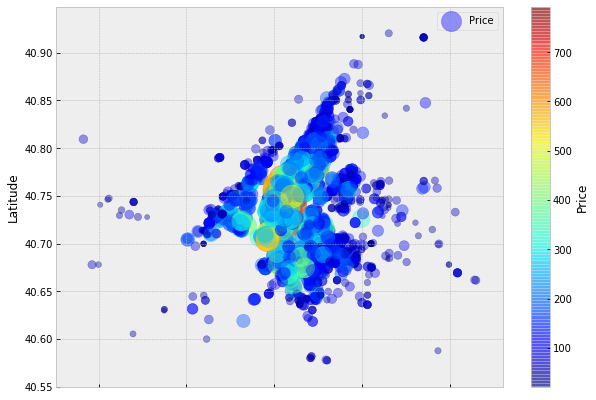

In [30]:
NewYorkData.plot(kind="scatter", x="Longitude", y="Latitude",s=NewYorkData['Price'], label="Price", c="Price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),)
plt.legend()
plt.show()



### Based on Time

In [310]:
AvgPrice_NY = group_by_date(NewYorkData)

In [311]:
#reate a data object
price_data = go.Scatter(x=AvgPrice_NY.index,y=AvgPrice_NY.values)

#set up the plot layout
layout1 = go.Layout(title='NY_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))

# create a figure and display it
fig1 = go.Figure(data=[price_data],layout=layout1)


#display the plot interactively
iplot(fig1)

# Unique Homes!!

In [26]:
unique_homes_NY = NewYorkData

In [27]:
unique_homes_NY.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int']).size()

Latitude  Longitude  Title                                                                Bedrooms_int  Bathrooms_num_int
40.57770  -73.93988  Mini Studio in NY city safest area                                   1.0            1.0                 2
40.57821  -73.94122  Private Studio, Oceanside beautiful and safe area                    1.0            1.0                 1
40.57973  -73.95799  Your Own Personal Heaven                                             1.0            1.0                 1
40.58012  -73.95896  Private room for two (1)                                             1.0            1.0                 2
40.58198  -73.95770  Private Room w/ private bath                                         1.0            1.0                 2
40.60000  -74.07700  Private Room For 1 w/ Separate Entrance Student / Intern / Traveler  1.0            1.0                 1
40.60541  -74.16074  Big Private w/ Queen size bed, wardrobe desk chair                   1.0            1.0        

In [10]:
#NewYorkData.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int']).ngroup()

In [29]:
unique_homes_NY['Group_ID'] = unique_homes_NY.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int']).grouper.group_info[0]

In [34]:
unique_homes_NY

level_0  index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0        2010   2010             0.0 2019-03-07            0.0 2019-03-12   
1        2011   2011             5.0 2019-03-07            5.0 2019-03-12   
2        2041   2041             4.5 2019-03-07            5.0 2019-03-12   
3        2046   2046             4.5 2019-03-07            5.0 2019-03-12   
4        2069   2069             5.0 2019-03-07            5.0 2019-03-12   
5        2119   2119             5.0 2019-03-07            5.0 2019-03-12   
6        2134   2134             5.0 2019-03-07            5.0 2019-03-12   
7        2143   2143             4.5 2019-03-07            4.5 2019-03-12   
8        2152   2152             0.0 2019-03-07            0.0 2019-03-12   
9          16     16             5.0 2019-03-21            5.0 2019-03-26   
10         25     25             0.0 2019-03-21            0.0 2019-03-26   
11         29     29             5.0 2019-03-21            5.0 2019-03-26   
12         50     50             4.5 2019-03-21            4.5 2019-03-26   
13         58     58             5.0 2019-03-21            5.0 2019-03-26   
14         61     61             5.0 2019-03-21            5.0 2019-03-26   
15         85     85             5.0 2019-03-21            5.0 2019-03-26   
16         86     86             5.0 2019-03-21            5.0 2019-03-26   
17         90     90             5.0 2019-03-21            5.0 2019-03-26   
18         91     91             5.0 2019-03-21            5.0 2019-03-26   
19        112    112             5.0 2019-03-21            5.0 2019-03-26   
20        138    138             5.0 2019-03-21            5.0 2019-03-26   
21       2185   2185             0.0 2019-04-04            0.0 2019-04-09   
22       2190   2190             5.0 2019-04-04            5.0 2019-04-09   
23       2192   2192             5.0 2019-04-04            5.0 2019-04-09   
24       2209   2209             4.5 2019-04-04            4.5 2019-04-09   
25       2228   2228             0.0 2019-04-04            0.0 2019-04-09   
26       2234   2234             5.0 2019-04-04            5.0 2019-04-09   
27       2259   2259             5.0 2019-04-04            5.0 2019-04-09   
28       2262   2262             5.0 2019-04-04            5.0 2019-04-09   
29       2283   2283             5.0 2019-04-04            5.0 2019-04-09   
...       ...    ...             ...        ...            ...        ...   
3927      543    543             5.0 2019-06-13            4.0 2019-06-18   
3928     2651   2651             5.0 2019-06-27            5.0 2019-07-02   
3929     2381   2381             4.5 2019-05-02            5.0 2019-05-07   
3930     2184   2184             0.0 2019-04-04            0.0 2019-04-09   
3931     2580   2580             0.0 2019-05-30            0.0 2019-06-04   
3932     1252   1252             5.0 2019-10-31            5.0 2019-11-05   
3933     3499   3499             5.0 2019-11-14            5.0 2019-11-19   
3934     2786   2786             5.0 2019-07-25            5.0 2019-07-30   
3935      770    770             5.0 2019-08-08            5.0 2019-08-13   
3936      295    295             5.0 2019-04-18            5.0 2019-04-23   
3937     2052   2052             0.0 2019-03-07            0.0 2019-03-12   
3938     2158   2158             5.0 2019-03-07            5.0 2019-03-12   
3939     2301   2301             5.0 2019-04-04            5.0 2019-04-09   
3940     1459   1459             5.0 2019-11-28            5.0 2019-12-03   
3941     3656   3656             5.0 2019-12-12            5.0 2019-12-17   
3942      113    113             5.0 2019-03-21            5.0 2019-03-26   
3943      995    995             5.0 2019-09-05            5.0 2019-09-10   
3944     1190   1190             5.0 2019-10-03            5.0 2019-10-08   
3945     3354   3354             5.0 2019-10-17            5.0 2019-10-22   
3946      146    146             5.0 2019-04-18            5.0 2019-04-23   
39

In [31]:
unique_homes_NY.reset_index(inplace=True)

In [33]:
unique_homes_NY.sort_index(by =['Group_ID','CheckIn'],inplace = True)

In [35]:
unique_homes_NY.Group_ID.unique()


array([  -1,    0,    1, ..., 1871, 1872, 1873], dtype=int64)

In [36]:
unique_homes_NY.head(-50)

level_0  index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0        2010   2010             0.0 2019-03-07            0.0 2019-03-12   
1        2011   2011             5.0 2019-03-07            5.0 2019-03-12   
2        2041   2041             4.5 2019-03-07            5.0 2019-03-12   
3        2046   2046             4.5 2019-03-07            5.0 2019-03-12   
4        2069   2069             5.0 2019-03-07            5.0 2019-03-12   
5        2119   2119             5.0 2019-03-07            5.0 2019-03-12   
6        2134   2134             5.0 2019-03-07            5.0 2019-03-12   
7        2143   2143             4.5 2019-03-07            4.5 2019-03-12   
8        2152   2152             0.0 2019-03-07            0.0 2019-03-12   
9          16     16             5.0 2019-03-21            5.0 2019-03-26   
10         25     25             0.0 2019-03-21            0.0 2019-03-26   
11         29     29             5.0 2019-03-21            5.0 2019-03-26   
12         50     50             4.5 2019-03-21            4.5 2019-03-26   
13         58     58             5.0 2019-03-21            5.0 2019-03-26   
14         61     61             5.0 2019-03-21            5.0 2019-03-26   
15         85     85             5.0 2019-03-21            5.0 2019-03-26   
16         86     86             5.0 2019-03-21            5.0 2019-03-26   
17         90     90             5.0 2019-03-21            5.0 2019-03-26   
18         91     91             5.0 2019-03-21            5.0 2019-03-26   
19        112    112             5.0 2019-03-21            5.0 2019-03-26   
20        138    138             5.0 2019-03-21            5.0 2019-03-26   
21       2185   2185             0.0 2019-04-04            0.0 2019-04-09   
22       2190   2190             5.0 2019-04-04            5.0 2019-04-09   
23       2192   2192             5.0 2019-04-04            5.0 2019-04-09   
24       2209   2209             4.5 2019-04-04            4.5 2019-04-09   
25       2228   2228             0.0 2019-04-04            0.0 2019-04-09   
26       2234   2234             5.0 2019-04-04            5.0 2019-04-09   
27       2259   2259             5.0 2019-04-04            5.0 2019-04-09   
28       2262   2262             5.0 2019-04-04            5.0 2019-04-09   
29       2283   2283             5.0 2019-04-04            5.0 2019-04-09   
...       ...    ...             ...        ...            ...        ...   
3877     1998   1998             5.0 2019-03-07            5.0 2019-03-12   
3878       12     12             5.0 2019-03-21            5.0 2019-03-26   
3879      175    175             5.0 2019-04-18            5.0 2019-04-23   
3880      379    379             5.0 2019-05-16            5.0 2019-05-21   
3881     2252   2252             4.5 2019-04-04            5.0 2019-04-09   
3882     2338   2338             4.5 2019-05-02            4.5 2019-05-07   
3883     1403   1403             5.0 2019-11-28            5.0 2019-12-03   
3884      266    266             5.0 2019-04-18            5.0 2019-04-23   
3885     2231   2231             5.0 2019-04-04            5.0 2019-04-09   
3886      463    463             4.5 2019-06-13            4.5 2019-06-18   
3887      921    921             4.5 2019-09-05            4.5 2019-09-10   
3888     1421   1421             4.5 2019-11-28            4.5 2019-12-03   
3889     1543   1543             4.5 2019-12-26            4.5 2019-12-31   
3890     3505   3505             4.5 2019-11-14            4.5 2019-11-19   
3891     3635   3635             4.5 2019-12-12            4.5 2019-12-17   
3892     2198   2198             5.0 2019-04-04            5.0 2019-04-09   
3893     1212   1212             5.0 2019-10-03            5.0 2019-10-08   
3894       13     13             5.0 2019-03-21            5.0 2019-03-26   
3895     2053   2053             0.0 2019-03-07            0.0 2019-03-12   
3896     2424   2424             0.0 2019-05-02            0.0 2019-05-07   
38

In [37]:
for i in unique_homes_NY.Group_ID.unique():
    print(i,'\n',unique_homes_NY[unique_homes_NY.Group_ID==i]['Price'])

-1 
 0      132.0
1      164.0
2       40.0
3      106.0
4       73.0
5      230.0
6      132.0
7       41.0
8      145.0
9      125.0
10      66.0
11     137.0
12      93.0
13      46.0
14     172.0
15     197.0
16      73.0
17     131.0
18     283.0
19     258.0
20     139.0
21       NaN
22     262.0
23     197.0
24     118.0
25     197.0
26     258.0
27      72.0
28     130.0
29     250.0
       ...  
579     92.0
580    140.0
581    239.0
582    166.0
583    173.0
584    113.0
585     40.0
586    208.0
587    146.0
588    199.0
589    134.0
590    247.0
591    172.0
592    146.0
593    120.0
594     66.0
595    214.0
596    113.0
597    193.0
598    166.0
599    265.0
600    193.0
601    199.0
602    114.0
603    233.0
604    152.0
605     49.0
606     56.0
607    160.0
608    120.0
Name: Price, Length: 609, dtype: float64
0 
 609    54.0
610    58.0
Name: Price, dtype: float64
1 
 611    66.0
Name: Price, dtype: float64
2 
 612    46.0
Name: Price, dtype: float64
3 
 613    58.0
6

 846    31.0
Name: Price, dtype: float64
143 
 847    73.0
848    72.0
849    77.0
Name: Price, dtype: float64
144 
 850    112.0
Name: Price, dtype: float64
145 
 851    170.0
Name: Price, dtype: float64
146 
 852    310.0
853    330.0
854    265.0
855    263.0
Name: Price, dtype: float64
147 
 856    86.0
857    86.0
858    86.0
Name: Price, dtype: float64
148 
 859    67.0
Name: Price, dtype: float64
149 
 860    66.0
861    66.0
Name: Price, dtype: float64
150 
 862    50.0
863    53.0
864    50.0
865    49.0
Name: Price, dtype: float64
151 
 866    390.0
867    390.0
868    390.0
869    392.0
Name: Price, dtype: float64
152 
 870    100.0
Name: Price, dtype: float64
153 
 871    54.0
Name: Price, dtype: float64
154 
 872    53.0
Name: Price, dtype: float64
155 
 873    73.0
874    73.0
Name: Price, dtype: float64
156 
 875    73.0
876    73.0
877    73.0
Name: Price, dtype: float64
157 
 878    66.0
879    66.0
Name: Price, dtype: float64
158 
 880    79.0
881    79.0
882    79.0


369 
 1236    211.0
Name: Price, dtype: float64
370 
 1237    93.0
1238    86.0
Name: Price, dtype: float64
371 
 1239    67.0
Name: Price, dtype: float64
372 
 1240    66.0
Name: Price, dtype: float64
373 
 1241    92.0
1242    92.0
1243    93.0
1244    93.0
Name: Price, dtype: float64
374 
 1245    52.0
Name: Price, dtype: float64
375 
 1246    131.0
Name: Price, dtype: float64
376 
 1247    132.0
Name: Price, dtype: float64
377 
 1248    55.0
Name: Price, dtype: float64
378 
 1249    211.0
1250    215.0
Name: Price, dtype: float64
379 
 1251    68.0
1252    68.0
1253    66.0
Name: Price, dtype: float64
380 
 1254    53.0
1255    55.0
1256    55.0
Name: Price, dtype: float64
381 
 1257    95.0
Name: Price, dtype: float64
382 
 1258    80.0
1259    93.0
Name: Price, dtype: float64
383 
 1260    98.0
Name: Price, dtype: float64
384 
 1261    238.0
1262    242.0
Name: Price, dtype: float64
385 
 1263    58.0
1264    60.0
Name: Price, dtype: float64
386 
 1265    261.0
Name: Price, dtype

583 
 1600    48.0
Name: Price, dtype: float64
584 
 1601    139.0
Name: Price, dtype: float64
585 
 1602    92.0
Name: Price, dtype: float64
586 
 1603    129.0
Name: Price, dtype: float64
587 
 1604    53.0
Name: Price, dtype: float64
588 
 1605    147.0
1606    149.0
1607    152.0
1608    156.0
1609    156.0
Name: Price, dtype: float64
589 
 1610    112.0
1611    121.0
Name: Price, dtype: float64
590 
 1612    113.0
Name: Price, dtype: float64
591 
 1613    144.0
Name: Price, dtype: float64
592 
 1614    132.0
Name: Price, dtype: float64
593 
 1615    170.0
Name: Price, dtype: float64
594 
 1616    190.0
1617    153.0
Name: Price, dtype: float64
595 
 1618    110.0
1619    110.0
Name: Price, dtype: float64
596 
 1620    132.0
1621    132.0
Name: Price, dtype: float64
597 
 1622    32.0
1623    33.0
Name: Price, dtype: float64
598 
 1624    82.0
Name: Price, dtype: float64
599 
 1625    215.0
1626    210.0
Name: Price, dtype: float64
600 
 1627    108.0
Name: Price, dtype: float64
60

822 
 2003     96.0
2004     96.0
2005    100.0
2006    100.0
Name: Price, dtype: float64
823 
 2007    184.0
Name: Price, dtype: float64
824 
 2008    270.0
2009    268.0
2010    270.0
Name: Price, dtype: float64
825 
 2011    118.0
Name: Price, dtype: float64
826 
 2012    87.0
Name: Price, dtype: float64
827 
 2013    324.0
Name: Price, dtype: float64
828 
 2014    88.0
Name: Price, dtype: float64
829 
 2015    185.0
Name: Price, dtype: float64
830 
 2016    53.0
2017    53.0
2018    53.0
2019    53.0
2020     NaN
2021    53.0
2022    53.0
2023    53.0
Name: Price, dtype: float64
831 
 2024    112.0
Name: Price, dtype: float64
832 
 2025    261.0
Name: Price, dtype: float64
833 
 2026    79.0
Name: Price, dtype: float64
834 
 2027    165.0
Name: Price, dtype: float64
835 
 2028    165.0
2029    165.0
Name: Price, dtype: float64
836 
 2030   NaN
Name: Price, dtype: float64
837 
 2031    201.0
2032    195.0
Name: Price, dtype: float64
838 
 2033    172.0
2034    173.0
2035    213.0
Na

 2266    200.0
2267    263.0
Name: Price, dtype: float64
972 
 2268    46.0
2269    50.0
Name: Price, dtype: float64
973 
 2270    79.0
Name: Price, dtype: float64
974 
 2271    112.0
Name: Price, dtype: float64
975 
 2272    137.0
2273    138.0
Name: Price, dtype: float64
976 
 2274    70.0
2275    70.0
Name: Price, dtype: float64
977 
 2276    132.0
Name: Price, dtype: float64
978 
 2277    53.0
Name: Price, dtype: float64
979 
 2278    140.0
2279    118.0
Name: Price, dtype: float64
980 
 2280    195.0
Name: Price, dtype: float64
981 
 2281    176.0
Name: Price, dtype: float64
982 
 2282    46.0
Name: Price, dtype: float64
983 
 2283    102.0
Name: Price, dtype: float64
984 
 2284    279.0
Name: Price, dtype: float64
985 
 2285    277.0
Name: Price, dtype: float64
986 
 2286    151.0
Name: Price, dtype: float64
987 
 2287    341.0
2288    341.0
2289    343.0
Name: Price, dtype: float64
988 
 2290    55.0
2291    57.0
2292    57.0
Name: Price, dtype: float64
989 
 2293    106.0
Name:

1292 
 2900    263.0
Name: Price, dtype: float64
1293 
 2901    224.0
Name: Price, dtype: float64
1294 
 2902    561.0
2903    561.0
Name: Price, dtype: float64
1295 
 2904    158.0
2905    158.0
Name: Price, dtype: float64
1296 
 2906    144.0
2907    144.0
Name: Price, dtype: float64
1297 
 2908    131.0
2909    144.0
2910    144.0
Name: Price, dtype: float64
1298 
 2911    51.0
Name: Price, dtype: float64
1299 
 2912    47.0
Name: Price, dtype: float64
1300 
 2913    66.0
2914    66.0
2915    66.0
Name: Price, dtype: float64
1301 
 2916    218.0
2917    218.0
Name: Price, dtype: float64
1302 
 2918    65.0
Name: Price, dtype: float64
1303 
 2919    65.0
Name: Price, dtype: float64
1304 
 2920    211.0
2921    144.0
2922    146.0
Name: Price, dtype: float64
1305 
 2923    161.0
2924    157.0
Name: Price, dtype: float64
1306 
 2925    144.0
2926    143.0
2927    144.0
Name: Price, dtype: float64
1307 
 2928    202.0
Name: Price, dtype: float64
1308 
 2929    97.0
2930    78.0
Name: Pr

1534 
 3362    134.0
Name: Price, dtype: float64
1535 
 3363    200.0
3364    199.0
Name: Price, dtype: float64
1536 
 3365    77.0
3366    66.0
Name: Price, dtype: float64
1537 
 3367    83.0
3368    83.0
Name: Price, dtype: float64
1538 
 3369    158.0
Name: Price, dtype: float64
1539 
 3370    112.0
Name: Price, dtype: float64
1540 
 3371    302.0
3372    305.0
3373    302.0
3374    305.0
3375    302.0
3376    302.0
3377    305.0
Name: Price, dtype: float64
1541 
 3378    125.0
Name: Price, dtype: float64
1542 
 3379    58.0
Name: Price, dtype: float64
1543 
 3380    145.0
3381    145.0
3382    145.0
Name: Price, dtype: float64
1544 
 3383    158.0
Name: Price, dtype: float64
1545 
 3384    106.0
Name: Price, dtype: float64
1546 
 3385    195.0
Name: Price, dtype: float64
1547 
 3386    251.0
3387    251.0
3388    219.0
Name: Price, dtype: float64
1548 
 3389    87.0
3390    79.0
3391    80.0
3392    80.0
Name: Price, dtype: float64
1549 
 3393    92.0
Name: Price, dtype: float64
15

1744 
 3751    104.0
Name: Price, dtype: float64
1745 
 3752    78.0
Name: Price, dtype: float64
1746 
 3753    90.0
Name: Price, dtype: float64
1747 
 3754    104.0
Name: Price, dtype: float64
1748 
 3755    55.0
Name: Price, dtype: float64
1749 
 3756    96.0
Name: Price, dtype: float64
1750 
 3757    174.0
Name: Price, dtype: float64
1751 
 3758    96.0
3759    96.0
Name: Price, dtype: float64
1752 
 3760    138.0
Name: Price, dtype: float64
1753 
 3761    226.0
Name: Price, dtype: float64
1754 
 3762    130.0
Name: Price, dtype: float64
1755 
 3763    129.0
Name: Price, dtype: float64
1756 
 3764    201.0
Name: Price, dtype: float64
1757 
 3765    53.0
Name: Price, dtype: float64
1758 
 3766    106.0
Name: Price, dtype: float64
1759 
 3767    72.0
Name: Price, dtype: float64
1760 
 3768    112.0
Name: Price, dtype: float64
1761 
 3769    53.0
3770    53.0
Name: Price, dtype: float64
1762 
 3771    40.0
Name: Price, dtype: float64
1763 
 3772    82.0
Name: Price, dtype: float64
1764

In [38]:
def price_trend(L):
    if all(x<y for x, y in zip(L, L[1:])):
        return('strictly_increasing')
    elif(all(x>y for x, y in zip(L, L[1:]))):
        return('strictly_decreasing')
    elif(all(x==y for x, y in zip(L, L[1:]))):
        return('no change')
    elif((all(x<y for x, y in zip(L, L[1:]))) or (all(x>y for x, y in zip(L, L[1:])))):
        return('monotonic')
    else:
        return('up-down')
        
    


In [39]:
unique_homes_NY['home_renting_trend']=-1
for i,j in enumerate(unique_homes_NY.Group_ID):
    if(j ==-1):
         unique_homes_NY['home_renting_trend'][i]= 'appeared_once'
    elif(unique_homes_NY[unique_homes_NY.Group_ID ==j].Group_ID.count()>1):
        unique_homes_NY['home_renting_trend'][i]= price_trend(unique_homes_NY[unique_homes_NY.Group_ID==j].Price)

In [40]:
unique_homes_NY

level_0  index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0        2010   2010             0.0 2019-03-07            0.0 2019-03-12   
1        2011   2011             5.0 2019-03-07            5.0 2019-03-12   
2        2041   2041             4.5 2019-03-07            5.0 2019-03-12   
3        2046   2046             4.5 2019-03-07            5.0 2019-03-12   
4        2069   2069             5.0 2019-03-07            5.0 2019-03-12   
5        2119   2119             5.0 2019-03-07            5.0 2019-03-12   
6        2134   2134             5.0 2019-03-07            5.0 2019-03-12   
7        2143   2143             4.5 2019-03-07            4.5 2019-03-12   
8        2152   2152             0.0 2019-03-07            0.0 2019-03-12   
9          16     16             5.0 2019-03-21            5.0 2019-03-26   
10         25     25             0.0 2019-03-21            0.0 2019-03-26   
11         29     29             5.0 2019-03-21            5.0 2019-03-26   
12         50     50             4.5 2019-03-21            4.5 2019-03-26   
13         58     58             5.0 2019-03-21            5.0 2019-03-26   
14         61     61             5.0 2019-03-21            5.0 2019-03-26   
15         85     85             5.0 2019-03-21            5.0 2019-03-26   
16         86     86             5.0 2019-03-21            5.0 2019-03-26   
17         90     90             5.0 2019-03-21            5.0 2019-03-26   
18         91     91             5.0 2019-03-21            5.0 2019-03-26   
19        112    112             5.0 2019-03-21            5.0 2019-03-26   
20        138    138             5.0 2019-03-21            5.0 2019-03-26   
21       2185   2185             0.0 2019-04-04            0.0 2019-04-09   
22       2190   2190             5.0 2019-04-04            5.0 2019-04-09   
23       2192   2192             5.0 2019-04-04            5.0 2019-04-09   
24       2209   2209             4.5 2019-04-04            4.5 2019-04-09   
25       2228   2228             0.0 2019-04-04            0.0 2019-04-09   
26       2234   2234             5.0 2019-04-04            5.0 2019-04-09   
27       2259   2259             5.0 2019-04-04            5.0 2019-04-09   
28       2262   2262             5.0 2019-04-04            5.0 2019-04-09   
29       2283   2283             5.0 2019-04-04            5.0 2019-04-09   
...       ...    ...             ...        ...            ...        ...   
3927      543    543             5.0 2019-06-13            4.0 2019-06-18   
3928     2651   2651             5.0 2019-06-27            5.0 2019-07-02   
3929     2381   2381             4.5 2019-05-02            5.0 2019-05-07   
3930     2184   2184             0.0 2019-04-04            0.0 2019-04-09   
3931     2580   2580             0.0 2019-05-30            0.0 2019-06-04   
3932     1252   1252             5.0 2019-10-31            5.0 2019-11-05   
3933     3499   3499             5.0 2019-11-14            5.0 2019-11-19   
3934     2786   2786             5.0 2019-07-25            5.0 2019-07-30   
3935      770    770             5.0 2019-08-08            5.0 2019-08-13   
3936      295    295             5.0 2019-04-18            5.0 2019-04-23   
3937     2052   2052             0.0 2019-03-07            0.0 2019-03-12   
3938     2158   2158             5.0 2019-03-07            5.0 2019-03-12   
3939     2301   2301             5.0 2019-04-04            5.0 2019-04-09   
3940     1459   1459             5.0 2019-11-28            5.0 2019-12-03   
3941     3656   3656             5.0 2019-12-12            5.0 2019-12-17   
3942      113    113             5.0 2019-03-21            5.0 2019-03-26   
3943      995    995             5.0 2019-09-05            5.0 2019-09-10   
3944     1190   1190             5.0 2019-10-03            5.0 2019-10-08   
3945     3354   3354             5.0 2019-10-17            5.0 2019-10-22   
3946      146    146             5.0 2019-04-18            5.0 2019-04-23   
39

In [41]:
unique_homes_NY['home_renting_trend'].replace(-1,'appeared_once', inplace=True)

In [42]:
unique_homes_NY

level_0  index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0        2010   2010             0.0 2019-03-07            0.0 2019-03-12   
1        2011   2011             5.0 2019-03-07            5.0 2019-03-12   
2        2041   2041             4.5 2019-03-07            5.0 2019-03-12   
3        2046   2046             4.5 2019-03-07            5.0 2019-03-12   
4        2069   2069             5.0 2019-03-07            5.0 2019-03-12   
5        2119   2119             5.0 2019-03-07            5.0 2019-03-12   
6        2134   2134             5.0 2019-03-07            5.0 2019-03-12   
7        2143   2143             4.5 2019-03-07            4.5 2019-03-12   
8        2152   2152             0.0 2019-03-07            0.0 2019-03-12   
9          16     16             5.0 2019-03-21            5.0 2019-03-26   
10         25     25             0.0 2019-03-21            0.0 2019-03-26   
11         29     29             5.0 2019-03-21            5.0 2019-03-26   
12         50     50             4.5 2019-03-21            4.5 2019-03-26   
13         58     58             5.0 2019-03-21            5.0 2019-03-26   
14         61     61             5.0 2019-03-21            5.0 2019-03-26   
15         85     85             5.0 2019-03-21            5.0 2019-03-26   
16         86     86             5.0 2019-03-21            5.0 2019-03-26   
17         90     90             5.0 2019-03-21            5.0 2019-03-26   
18         91     91             5.0 2019-03-21            5.0 2019-03-26   
19        112    112             5.0 2019-03-21            5.0 2019-03-26   
20        138    138             5.0 2019-03-21            5.0 2019-03-26   
21       2185   2185             0.0 2019-04-04            0.0 2019-04-09   
22       2190   2190             5.0 2019-04-04            5.0 2019-04-09   
23       2192   2192             5.0 2019-04-04            5.0 2019-04-09   
24       2209   2209             4.5 2019-04-04            4.5 2019-04-09   
25       2228   2228             0.0 2019-04-04            0.0 2019-04-09   
26       2234   2234             5.0 2019-04-04            5.0 2019-04-09   
27       2259   2259             5.0 2019-04-04            5.0 2019-04-09   
28       2262   2262             5.0 2019-04-04            5.0 2019-04-09   
29       2283   2283             5.0 2019-04-04            5.0 2019-04-09   
...       ...    ...             ...        ...            ...        ...   
3927      543    543             5.0 2019-06-13            4.0 2019-06-18   
3928     2651   2651             5.0 2019-06-27            5.0 2019-07-02   
3929     2381   2381             4.5 2019-05-02            5.0 2019-05-07   
3930     2184   2184             0.0 2019-04-04            0.0 2019-04-09   
3931     2580   2580             0.0 2019-05-30            0.0 2019-06-04   
3932     1252   1252             5.0 2019-10-31            5.0 2019-11-05   
3933     3499   3499             5.0 2019-11-14            5.0 2019-11-19   
3934     2786   2786             5.0 2019-07-25            5.0 2019-07-30   
3935      770    770             5.0 2019-08-08            5.0 2019-08-13   
3936      295    295             5.0 2019-04-18            5.0 2019-04-23   
3937     2052   2052             0.0 2019-03-07            0.0 2019-03-12   
3938     2158   2158             5.0 2019-03-07            5.0 2019-03-12   
3939     2301   2301             5.0 2019-04-04            5.0 2019-04-09   
3940     1459   1459             5.0 2019-11-28            5.0 2019-12-03   
3941     3656   3656             5.0 2019-12-12            5.0 2019-12-17   
3942      113    113             5.0 2019-03-21            5.0 2019-03-26   
3943      995    995             5.0 2019-09-05            5.0 2019-09-10   
3944     1190   1190             5.0 2019-10-03            5.0 2019-10-08   
3945     3354   3354             5.0 2019-10-17            5.0 2019-10-22   
3946      146    146             5.0 2019-04-18            5.0 2019-04-23   
39

In [43]:
unique_homes_NY['home_renting_trend'].unique()

array(['appeared_once', 'strictly_increasing', 'strictly_decreasing',
       'no change', 'up-down'], dtype=object)

In [44]:
unique_homes_NY[unique_homes_NY.Group_ID==1854]

level_0  index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
3925     2315   2315             5.0 2019-05-02            4.0 2019-05-07   
3926     2488   2488             5.0 2019-05-30            4.0 2019-06-04   
3927      543    543             5.0 2019-06-13            4.0 2019-06-18   

      Cleanliness_stars  Communication_stars  Latitude  Location_stars  \
3925                4.5                  4.5  40.85127             5.0   
3926                4.5                  4.5  40.85127             5.0   
3927                4.5                  4.5  40.85127             5.0   

            ...          Washer  Waterfront  Wifi  Window guards  \
3925        ...               0           0     1              0   
3926        ...               0           0     1              0   
3927        ...               0           0     1              0   

      Reviewers_no                      Title  normalized_price  Group_ID  \
3925             6  Great value in Manhattan!          0.159836      1854   
3926             6  Great value in Manhattan!          0.159836      1854   
3927             6  Great value in Manhattan!          0.163934      1854   

      home_renting_trend  Super_host_string  
3925             up-down                not  
3926             up-down                not  
3927             up-down                not  

[3 rows x 115 columns]

In [45]:
unique_homes_NY['Super_host_string'] =unique_homes_NY.Super_host.map({1:'Super',0:'not'})

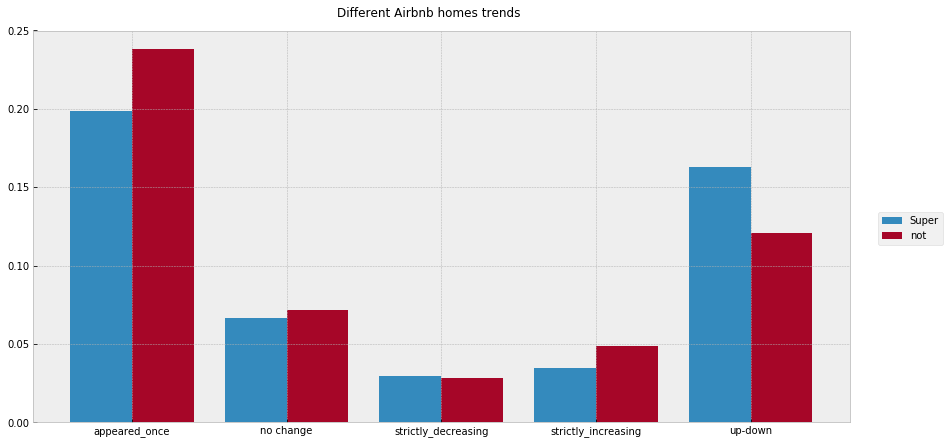

In [46]:
dxp.aggplot('home_renting_trend', data=unique_homes_NY,hue='Super_host_string' ,normalize='all',ylabel="Percentage of homes",title="Different Airbnb homes trends")

So it looks that we have different trends for the average price among different homes: "appeared_once" for homes that are posted once. Also,we see the price being fixed for some homes. More other patterns are also detected with other observations showing that the price is strictly_increasing,strictly_decreasing, or up_down!   

# Correlation/ Holding other variables constant

In [79]:
fixed_size_homes_NY = NewYorkData

In [80]:
fixed_size_homes_NY

Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  Cleanliness_stars  \
0                5.0 2019-03-21            5.0 2019-03-26                5.0   
1                4.5 2019-03-21            4.5 2019-03-26                4.0   
2                5.0 2019-03-21            5.0 2019-03-26                5.0   
3                5.0 2019-03-21            5.0 2019-03-26                5.0   
4                5.0 2019-03-21            5.0 2019-03-26                5.0   
5                0.0 2019-03-21            0.0 2019-03-26                0.0   
6                5.0 2019-03-21            5.0 2019-03-26                5.0   
7                5.0 2019-03-21            5.0 2019-03-26                5.0   
8                4.5 2019-03-21            4.5 2019-03-26                3.5   
9                5.0 2019-03-21            5.0 2019-03-26                5.0   
10               0.0 2019-03-21            0.0 2019-03-26                0.0   
11               0.0 2019-03-21            0.0 2019-03-26                0.0   
12               5.0 2019-03-21            5.0 2019-03-26                5.0   
13               5.0 2019-03-21            5.0 2019-03-26                5.0   
14               5.0 2019-03-21            5.0 2019-03-26                4.5   
15               0.0 2019-03-21            0.0 2019-03-26                0.0   
16               5.0 2019-03-21            5.0 2019-03-26                4.5   
17               0.0 2019-03-21            0.0 2019-03-26                0.0   
18               5.0 2019-03-21            5.0 2019-03-26                4.5   
19               0.0 2019-03-21            0.0 2019-03-26                0.0   
20               5.0 2019-03-21            5.0 2019-03-26                4.5   
21               5.0 2019-03-21            5.0 2019-03-26                5.0   
22               4.5 2019-03-21            4.5 2019-03-26                4.5   
23               5.0 2019-03-21            5.0 2019-03-26                5.0   
24               0.0 2019-03-21            0.0 2019-03-26                0.0   
25               0.0 2019-03-21            0.0 2019-03-26                0.0   
26               5.0 2019-03-21            4.5 2019-03-26                4.5   
27               4.5 2019-03-21            4.5 2019-03-26                3.5   
28               5.0 2019-03-21            5.0 2019-03-26                4.5   
29               5.0 2019-03-21            5.0 2019-03-26                4.5   
...              ...        ...            ...        ...                ...   
3927             5.0 2020-02-06            5.0 2020-02-11                4.5   
3928             5.0 2020-02-06            5.0 2020-02-11                5.0   
3929             5.0 2020-02-06            4.5 2020-02-11                4.5   
3930             5.0 2020-02-06            5.0 2020-02-11                5.0   
3931             5.0 2020-02-06            5.0 2020-02-11                5.0   
3932             5.0 2020-02-06            5.0 2020-02-11                5.0   
3933             5.0 2020-02-06            5.0 2020-02-11                4.5   
3934             5.0 2020-02-06            5.0 2020-02-11                5.0   
3935             4.5 2020-02-06            5.0 2020-02-11                5.0   
3936             5.0 2020-02-06            5.0 2020-02-11                5.0   
3937             5.0 2020-02-06            5.0 2020-02-11                5.0   
3938             4.5 2020-02-06            4.5 2020-02-11                4.5   
3939             5.0 2020-02-06            5.0 2020-02-11                4.5   
3940             5.0 2020-02-06            5.0 2020-02-11                4.5   
3941             4.5 2020-02-06            4.5 2020-02-11                4.5   
3942             5.0 2020-02-06            5.0 2020-02-11                5.0   
3943             5.0 2020-02-06            5.0 2020-02-11                5.0   
3944             4.5 2020-02-06            4.0 2020-02-11                4.5   
3945  

### What sizes we have in our data?! 

In [81]:
fixed_size_homes_NY.Bedrooms_int.unique()

array([ 1., nan,  2.,  3.,  4.,  5.,  6.])

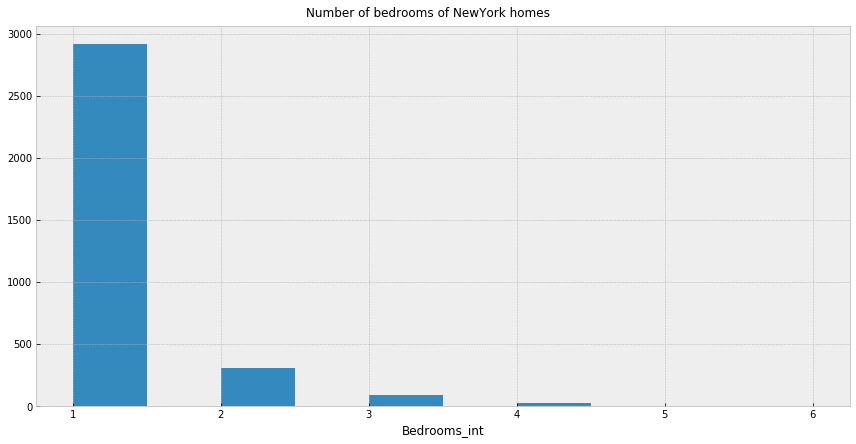

In [108]:
dxp.aggplot('Bedrooms_int', data=fixed_size_homes_NY ,kind='hist',ylabel="Percentage of homes",title="Number of bedrooms of NewYork homes")

In [83]:
fixed_size_homes_NY['Group_ID'] = fixed_size_homes_NY .groupby(['Bedrooms_int']).grouper.group_info[0]

In [84]:
fixed_size_homes_NY

Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  Cleanliness_stars  \
0                5.0 2019-03-21            5.0 2019-03-26                5.0   
1                4.5 2019-03-21            4.5 2019-03-26                4.0   
2                5.0 2019-03-21            5.0 2019-03-26                5.0   
3                5.0 2019-03-21            5.0 2019-03-26                5.0   
4                5.0 2019-03-21            5.0 2019-03-26                5.0   
5                0.0 2019-03-21            0.0 2019-03-26                0.0   
6                5.0 2019-03-21            5.0 2019-03-26                5.0   
7                5.0 2019-03-21            5.0 2019-03-26                5.0   
8                4.5 2019-03-21            4.5 2019-03-26                3.5   
9                5.0 2019-03-21            5.0 2019-03-26                5.0   
10               0.0 2019-03-21            0.0 2019-03-26                0.0   
11               0.0 2019-03-21            0.0 2019-03-26                0.0   
12               5.0 2019-03-21            5.0 2019-03-26                5.0   
13               5.0 2019-03-21            5.0 2019-03-26                5.0   
14               5.0 2019-03-21            5.0 2019-03-26                4.5   
15               0.0 2019-03-21            0.0 2019-03-26                0.0   
16               5.0 2019-03-21            5.0 2019-03-26                4.5   
17               0.0 2019-03-21            0.0 2019-03-26                0.0   
18               5.0 2019-03-21            5.0 2019-03-26                4.5   
19               0.0 2019-03-21            0.0 2019-03-26                0.0   
20               5.0 2019-03-21            5.0 2019-03-26                4.5   
21               5.0 2019-03-21            5.0 2019-03-26                5.0   
22               4.5 2019-03-21            4.5 2019-03-26                4.5   
23               5.0 2019-03-21            5.0 2019-03-26                5.0   
24               0.0 2019-03-21            0.0 2019-03-26                0.0   
25               0.0 2019-03-21            0.0 2019-03-26                0.0   
26               5.0 2019-03-21            4.5 2019-03-26                4.5   
27               4.5 2019-03-21            4.5 2019-03-26                3.5   
28               5.0 2019-03-21            5.0 2019-03-26                4.5   
29               5.0 2019-03-21            5.0 2019-03-26                4.5   
...              ...        ...            ...        ...                ...   
3927             5.0 2020-02-06            5.0 2020-02-11                4.5   
3928             5.0 2020-02-06            5.0 2020-02-11                5.0   
3929             5.0 2020-02-06            4.5 2020-02-11                4.5   
3930             5.0 2020-02-06            5.0 2020-02-11                5.0   
3931             5.0 2020-02-06            5.0 2020-02-11                5.0   
3932             5.0 2020-02-06            5.0 2020-02-11                5.0   
3933             5.0 2020-02-06            5.0 2020-02-11                4.5   
3934             5.0 2020-02-06            5.0 2020-02-11                5.0   
3935             4.5 2020-02-06            5.0 2020-02-11                5.0   
3936             5.0 2020-02-06            5.0 2020-02-11                5.0   
3937             5.0 2020-02-06            5.0 2020-02-11                5.0   
3938             4.5 2020-02-06            4.5 2020-02-11                4.5   
3939             5.0 2020-02-06            5.0 2020-02-11                4.5   
3940             5.0 2020-02-06            5.0 2020-02-11                4.5   
3941             4.5 2020-02-06            4.5 2020-02-11                4.5   
3942             5.0 2020-02-06            5.0 2020-02-11                5.0   
3943             5.0 2020-02-06            5.0 2020-02-11                5.0   
3944             4.5 2020-02-06            4.0 2020-02-11                4.5   
3945  

In [85]:
fixed_size_homes_NY.sort_index(by =['Group_ID'],inplace = True)

In [86]:
fixed_size_homes_NY

Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  Cleanliness_stars  \
3956             5.0 2020-02-06            5.0 2020-02-11                5.0   
2961             5.0 2019-08-22            5.0 2019-08-27                5.0   
924              5.0 2019-09-05            5.0 2019-09-10                5.0   
930              5.0 2019-09-05            5.0 2019-09-10                5.0   
2954             5.0 2019-08-22            4.5 2019-08-27                5.0   
933              4.5 2019-09-05            5.0 2019-09-10                4.5   
2952             5.0 2019-08-22            4.5 2019-08-27                5.0   
2949             5.0 2019-08-22            5.0 2019-08-27                5.0   
2947             5.0 2019-08-22            5.0 2019-08-27                5.0   
942              5.0 2019-09-05            5.0 2019-09-10                5.0   
2943             5.0 2019-08-22            5.0 2019-08-27                4.0   
946              0.0 2019-09-05            0.0 2019-09-10                0.0   
2971             5.0 2019-08-22            5.0 2019-08-27                5.0   
953              5.0 2019-09-05            5.0 2019-09-10                5.0   
957              5.0 2019-09-05            5.0 2019-09-10                4.5   
2930             5.0 2019-08-22            5.0 2019-08-27                4.5   
2921             5.0 2019-08-22            5.0 2019-08-27                5.0   
970              5.0 2019-09-05            5.0 2019-09-10                5.0   
2918             4.5 2019-08-22            4.5 2019-08-27                4.0   
2917             5.0 2019-08-22            5.0 2019-08-27                5.0   
978              5.0 2019-09-05            5.0 2019-09-10                5.0   
2913             5.0 2019-08-22            5.0 2019-08-27                4.5   
2910             4.5 2019-08-22            5.0 2019-08-27                5.0   
983              5.0 2019-09-05            5.0 2019-09-10                5.0   
991              4.5 2019-09-05            4.5 2019-09-10                4.5   
2935             5.0 2019-08-22            5.0 2019-08-27                4.5   
2973             5.0 2019-08-22            5.0 2019-08-27                5.0   
905              5.0 2019-09-05            5.0 2019-09-10                5.0   
2982             5.0 2019-08-22            5.0 2019-08-27                5.0   
825              5.0 2019-08-08            5.0 2019-08-13                5.0   
...              ...        ...            ...        ...                ...   
3826             5.0 2020-02-06            4.5 2020-02-11                5.0   
3703             5.0 2020-01-09            4.5 2020-01-14                5.0   
1817             4.5 2020-01-23            4.5 2020-01-28                5.0   
3852             5.0 2020-02-06            5.0 2020-02-11                5.0   
3882             5.0 2020-02-06            5.0 2020-02-11                5.0   
1937             5.0 2020-02-20            5.0 2020-02-25                5.0   
1876             5.0 2020-02-20            5.0 2020-02-25                5.0   
526              4.0 2019-06-13            5.0 2019-06-18                4.5   
1805             4.5 2020-01-23            5.0 2020-01-28                4.5   
3841             5.0 2020-02-06            5.0 2020-02-11                5.0   
3222             4.5 2019-10-17            4.5 2019-10-22                4.0   
3716             4.5 2020-01-09            4.5 2020-01-14                4.5   
3474             5.0 2019-11-14            5.0 2019-11-19                5.0   
3718             4.5 2020-01-09            5.0 2020-01-14                4.5   
107              5.0 2019-03-21            5.0 2019-03-26                5.0   
3440             4.5 2019-11-14            4.5 2019-11-19                4.0   
2879             4.5 2019-07-25            4.5 2019-07-30                4.0   
829              5.0 2019-08-08            5.0 2019-08-13                5.0   
3788  

In [90]:
fixed_size_homes_NY[fixed_size_homes_NY.Group_ID ==-1]['Bedrooms_int'].head(20)

3956   NaN
2961   NaN
924    NaN
930    NaN
2954   NaN
933    NaN
2952   NaN
2949   NaN
2947   NaN
942    NaN
2943   NaN
946    NaN
2971   NaN
953    NaN
957    NaN
2930   NaN
2921   NaN
970    NaN
2918   NaN
2917   NaN
Name: Bedrooms_int, dtype: float64

In [91]:
fixed_size_homes_NY.reset_index(inplace=True)

In [92]:
fixed_size_homes_NY

index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0      3956             5.0 2020-02-06            5.0 2020-02-11   
1      2961             5.0 2019-08-22            5.0 2019-08-27   
2       924             5.0 2019-09-05            5.0 2019-09-10   
3       930             5.0 2019-09-05            5.0 2019-09-10   
4      2954             5.0 2019-08-22            4.5 2019-08-27   
5       933             4.5 2019-09-05            5.0 2019-09-10   
6      2952             5.0 2019-08-22            4.5 2019-08-27   
7      2949             5.0 2019-08-22            5.0 2019-08-27   
8      2947             5.0 2019-08-22            5.0 2019-08-27   
9       942             5.0 2019-09-05            5.0 2019-09-10   
10     2943             5.0 2019-08-22            5.0 2019-08-27   
11      946             0.0 2019-09-05            0.0 2019-09-10   
12     2971             5.0 2019-08-22            5.0 2019-08-27   
13      953             5.0 2019-09-05            5.0 2019-09-10   
14      957             5.0 2019-09-05            5.0 2019-09-10   
15     2930             5.0 2019-08-22            5.0 2019-08-27   
16     2921             5.0 2019-08-22            5.0 2019-08-27   
17      970             5.0 2019-09-05            5.0 2019-09-10   
18     2918             4.5 2019-08-22            4.5 2019-08-27   
19     2917             5.0 2019-08-22            5.0 2019-08-27   
20      978             5.0 2019-09-05            5.0 2019-09-10   
21     2913             5.0 2019-08-22            5.0 2019-08-27   
22     2910             4.5 2019-08-22            5.0 2019-08-27   
23      983             5.0 2019-09-05            5.0 2019-09-10   
24      991             4.5 2019-09-05            4.5 2019-09-10   
25     2935             5.0 2019-08-22            5.0 2019-08-27   
26     2973             5.0 2019-08-22            5.0 2019-08-27   
27      905             5.0 2019-09-05            5.0 2019-09-10   
28     2982             5.0 2019-08-22            5.0 2019-08-27   
29      825             5.0 2019-08-08            5.0 2019-08-13   
...     ...             ...        ...            ...        ...   
3927   3826             5.0 2020-02-06            4.5 2020-02-11   
3928   3703             5.0 2020-01-09            4.5 2020-01-14   
3929   1817             4.5 2020-01-23            4.5 2020-01-28   
3930   3852             5.0 2020-02-06            5.0 2020-02-11   
3931   3882             5.0 2020-02-06            5.0 2020-02-11   
3932   1937             5.0 2020-02-20            5.0 2020-02-25   
3933   1876             5.0 2020-02-20            5.0 2020-02-25   
3934    526             4.0 2019-06-13            5.0 2019-06-18   
3935   1805             4.5 2020-01-23            5.0 2020-01-28   
3936   3841             5.0 2020-02-06            5.0 2020-02-11   
3937   3222             4.5 2019-10-17            4.5 2019-10-22   
3938   3716             4.5 2020-01-09            4.5 2020-01-14   
3939   3474             5.0 2019-11-14            5.0 2019-11-19   
3940   3718             4.5 2020-01-09            5.0 2020-01-14   
3941    107             5.0 2019-03-21            5.0 2019-03-26   
3942   3440             4.5 2019-11-14            4.5 2019-11-19   
3943   2879             4.5 2019-07-25            4.5 2019-07-30   
3944    829             5.0 2019-08-08            5.0 2019-08-13   
3945   3788             4.5 2020-01-09            4.5 2020-01-14   
3946   2958             4.5 2019-08-22            5.0 2019-08-27   
3947   1064             4.5 2019-10-03            4.5 2019-10-08   
3948   1975             4.5 2020-02-20            5.0 2020-02-25   
3949   1927             5.0 2020-02-20            5.0 2020-02-25   
3950   1720             4.5 2020-01-23            5.0 2020-01-28   
3951   3734             5.0 2020-01-09            5.0 2020-01-14   
3952    927             4.5 2019-09-05            4.5 2019-09-10   
3953   1047             5.0 2019-09-05            5.0 2019-09-

In [93]:
fixed_size_homes_NY.Group_ID.unique()


array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [94]:
fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 4].Bedrooms_int

3953    5.0
3954    5.0
3955    5.0
Name: Bedrooms_int, dtype: float64

In [95]:
one_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 0]
two_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 1]
three_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 2]
four_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 3]
five_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 4]
six_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 5]

In [96]:
one_bed_homes_review = one_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
two_bed_homes_review = two_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
three_bed_homes_review = three_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
four_bed_homes_review = four_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
five_bed_homes_review = five_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
six_bed_homes_review = six_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]


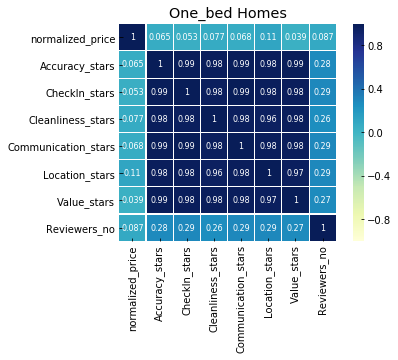

In [98]:
ax = plt.axes()
sns.heatmap(one_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('One_bed Homes')
plt.show()

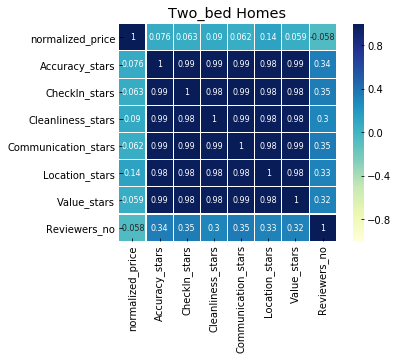

In [99]:
ax = plt.axes()
sns.heatmap(two_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Two_bed Homes')
plt.show()

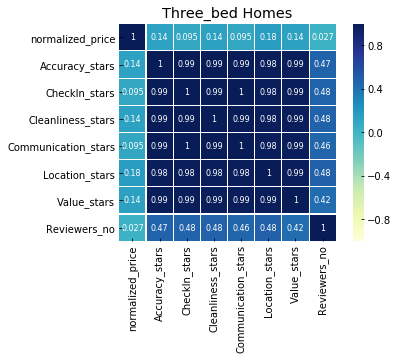

In [100]:
ax = plt.axes()
sns.heatmap(three_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Three_bed Homes')
plt.show()

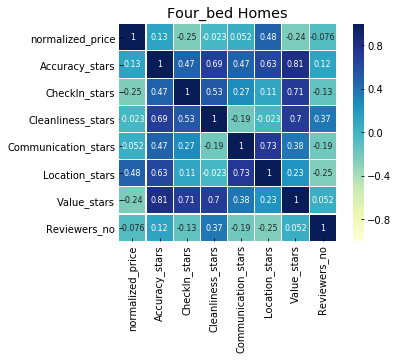

In [101]:
ax = plt.axes()
sns.heatmap(four_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Four_bed Homes')
plt.show()

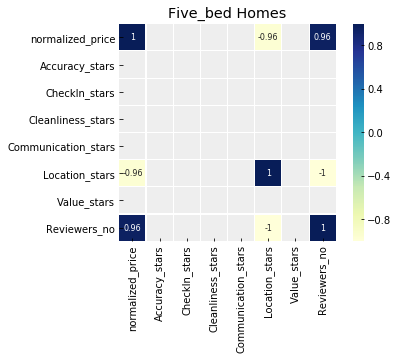

In [102]:
ax = plt.axes()
sns.heatmap(five_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Five_bed Homes')
plt.show()

In [103]:
five_bed_homes_review

normalized_price  Accuracy_stars  CheckIn_stars  Cleanliness_stars  \
3953          1.069672             5.0            5.0                5.0   
3954          1.758197             5.0            5.0                5.0   
3955          0.778689             5.0            5.0                5.0   

      Communication_stars  Location_stars  Value_stars  Reviewers_no  
3953                  5.0             5.0          5.0            12  
3954                  5.0             4.5          5.0            89  
3955                  5.0             5.0          5.0            12

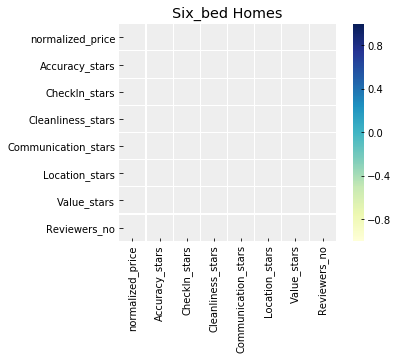

In [104]:
ax = plt.axes()
sns.heatmap(six_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Six_bed Homes')
plt.show()

In [105]:
six_bed_homes_review

normalized_price  Accuracy_stars  CheckIn_stars  Cleanliness_stars  \
3956          1.360656             0.0            0.0                0.0   

      Communication_stars  Location_stars  Value_stars  Reviewers_no  
3956                  0.0             0.0          0.0             2

In [106]:
NewYorkData.iloc[3956]

index                                                                     1889
Accuracy_stars                                                               0
CheckIn                                                    2020-02-20 00:00:00
CheckIn_stars                                                                0
CheckOut                                                   2020-02-25 00:00:00
Cleanliness_stars                                                            0
Communication_stars                                                          0
Latitude                                                               40.7276
Location_stars                                                               0
Longitude                                                             -74.0441
Price                                                                      332
Super_host                                                                   0
Value_stars                                         

ValueError: not enough values to unpack (expected 7, got 3)

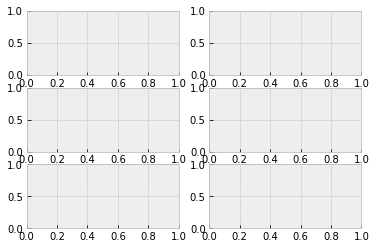

In [107]:
f,(ax1,ax2,ax3,ax4,ax5,ax6,axcb) = plt.subplots(3,2)
ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5,ax6)
g1 = sns.heatmap(one_bed_homes_review.corr(),cmap='YlGnBu', annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(two_bed_homes_review.corr(),cmap='YlGnBu', annot=True, annot_kws={"size": 8}, square=True, cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(three_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax3)

g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
g4=sns.heatmap(four_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax4)
g5=sns.heatmap(five_bed_homes_review.corr(),cmap='YlGnBu',  vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax5)
g6=sns.heatmap(six_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax6,cbar_ax=axcb)

for ax in [g1,g2,g3,g4,g5,g6]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

In [ ]:
#from scipy.spatial.distance import pdist, squareform

#distances = pdist(sample.values, metric='euclidean')
#dist_matrix = squareform(distances)

In [88]:
#len(NewYork_Uniquehomes)/len(NewYorkData)
#NewYork_Uniquehomes
#NewYork_Uniquehomes.get_group((40.63163, -74.09297,'Stunning 1 Bedroom Apartment. 8 minutes to Ferry',1.0,1.0))

In [ ]:
#Bangkok_Uniquehomes = BangkokData_clean.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int'], as_index= True)
#len(Bangkok_Uniquehomes.groups)
#Bangkok_Uniquehomes.groups

In [ ]:
#Cairo_Uniquehomes = CairoData_clean.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int'], as_index= True)
#len(Cairo_Uniquehomes.groups)
#Cairo_Uniquehomes.groups

In [121]:
bins = [0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
names = ['_0.5', '_1', '_1.5','_2','_2.5','_3','_3.5','_4','_4.5','_5']

one_bed_homes_review['AccuracyStars_interval']= pd.cut(one_bed_homes_review['Accuracy_stars'], bins, labels=names)
one_bed_homes_review['LocationStars_interval']= pd.cut(one_bed_homes_review['Location_stars'], bins, labels=names)
one_bed_homes_review['CheckInStars_interval']= pd.cut(one_bed_homes_review['CheckIn_stars'], bins, labels=names)
one_bed_homes_review['ValueStars_interval']= pd.cut(one_bed_homes_review['Value_stars'], bins, labels=names)
one_bed_homes_review['CommunicationStars_interval']= pd.cut(one_bed_homes_review['Communication_stars'], bins, labels=names)
one_bed_homes_review['CleanlStars_interval']= pd.cut(one_bed_homes_review['Cleanliness_stars'], bins, labels=names)


In [122]:
one_bed_homes_review

normalized_price  Accuracy_stars  CheckIn_stars  Cleanliness_stars  \
609           0.864754             0.0            0.0                0.0   
610           0.618852             4.5            5.0                4.5   
611           0.491803             5.0            5.0                5.0   
612           0.217213             5.0            5.0                5.0   
613           0.397541             5.0            5.0                4.5   
614           0.811475             5.0            5.0                5.0   
615           0.184426             0.0            0.0                0.0   
616           1.028689             5.0            5.0                4.5   
617           0.356557             5.0            5.0                5.0   
618           0.532787             5.0            5.0                5.0   
619           0.508197             5.0            5.0                5.0   
620           0.372951             5.0            5.0                5.0   
621           0.323770             5.0            5.0                5.0   
622           0.204918             5.0            5.0                5.0   
623           1.057377             4.0            4.5                4.0   
624           0.225410             4.5            4.5                4.5   
625           0.434426             5.0            5.0                4.5   
626           0.762295             0.0            0.0                0.0   
627           0.540984             5.0            5.0                5.0   
628           0.491803             5.0            5.0                5.0   
629           0.737705             5.0            5.0                4.5   
630           0.217213             0.0            0.0                0.0   
631           0.209016             0.0            0.0                0.0   
632           0.209016             5.0            5.0                5.0   
633           0.159836             5.0            4.0                4.5   
634           0.704918             5.0            4.5                5.0   
635           0.192623             5.0            5.0                5.0   
636           0.729508             2.5            2.0                2.5   
637           0.495902             5.0            5.0                5.0   
638           0.909836             5.0            5.0                5.0   
...                ...             ...            ...                ...   
3493          1.090164             0.0            0.0                0.0   
3494          0.573770             5.0            5.0                5.0   
3495          0.553279             5.0            5.0                4.5   
3496          0.372951             5.0            5.0                4.5   
3497          0.905738             5.0            5.0                5.0   
3498          0.348361             5.0            5.0                5.0   
3499          0.516393             5.0            5.0                5.0   
3500          0.704918             5.0            5.0                5.0   
3501          0.217213             5.0            5.0                5.0   
3502          0.557377             4.5            5.0                4.5   
3503          0.409836             0.0            0.0                0.0   
3504          0.352459             5.0            5.0                5.0   
3505          0.299180             5.0            5.0                4.5   
3506          0.491803             5.0            5.0                5.0   
3507          0.286885             5.0            5.0                4.5   
3508          0.377049             4.5            4.5                4.5   
3509          0.364754             5.0            5.0                5.0   
3510          0.508197             5.0            5.0                5.0   
3511          0.491803             5.0            5.0                4.5   
3512          0.290984             5.0            5.0                5.0   
3513          1.090164             5.0            5.0 

In [131]:
one_bed_homes_review.columns

Index(['normalized_price', 'Accuracy_stars', 'CheckIn_stars',
       'Cleanliness_stars', 'Communication_stars', 'Location_stars',
       'Value_stars', 'Reviewers_no', 'AccuracyStars_interval',
       'LocationStars_interval', 'CheckInStars_interval',
       'ValueStars_interval', 'CommunicationStars_interval',
       'CleanlStars_interval'],
      dtype='object')

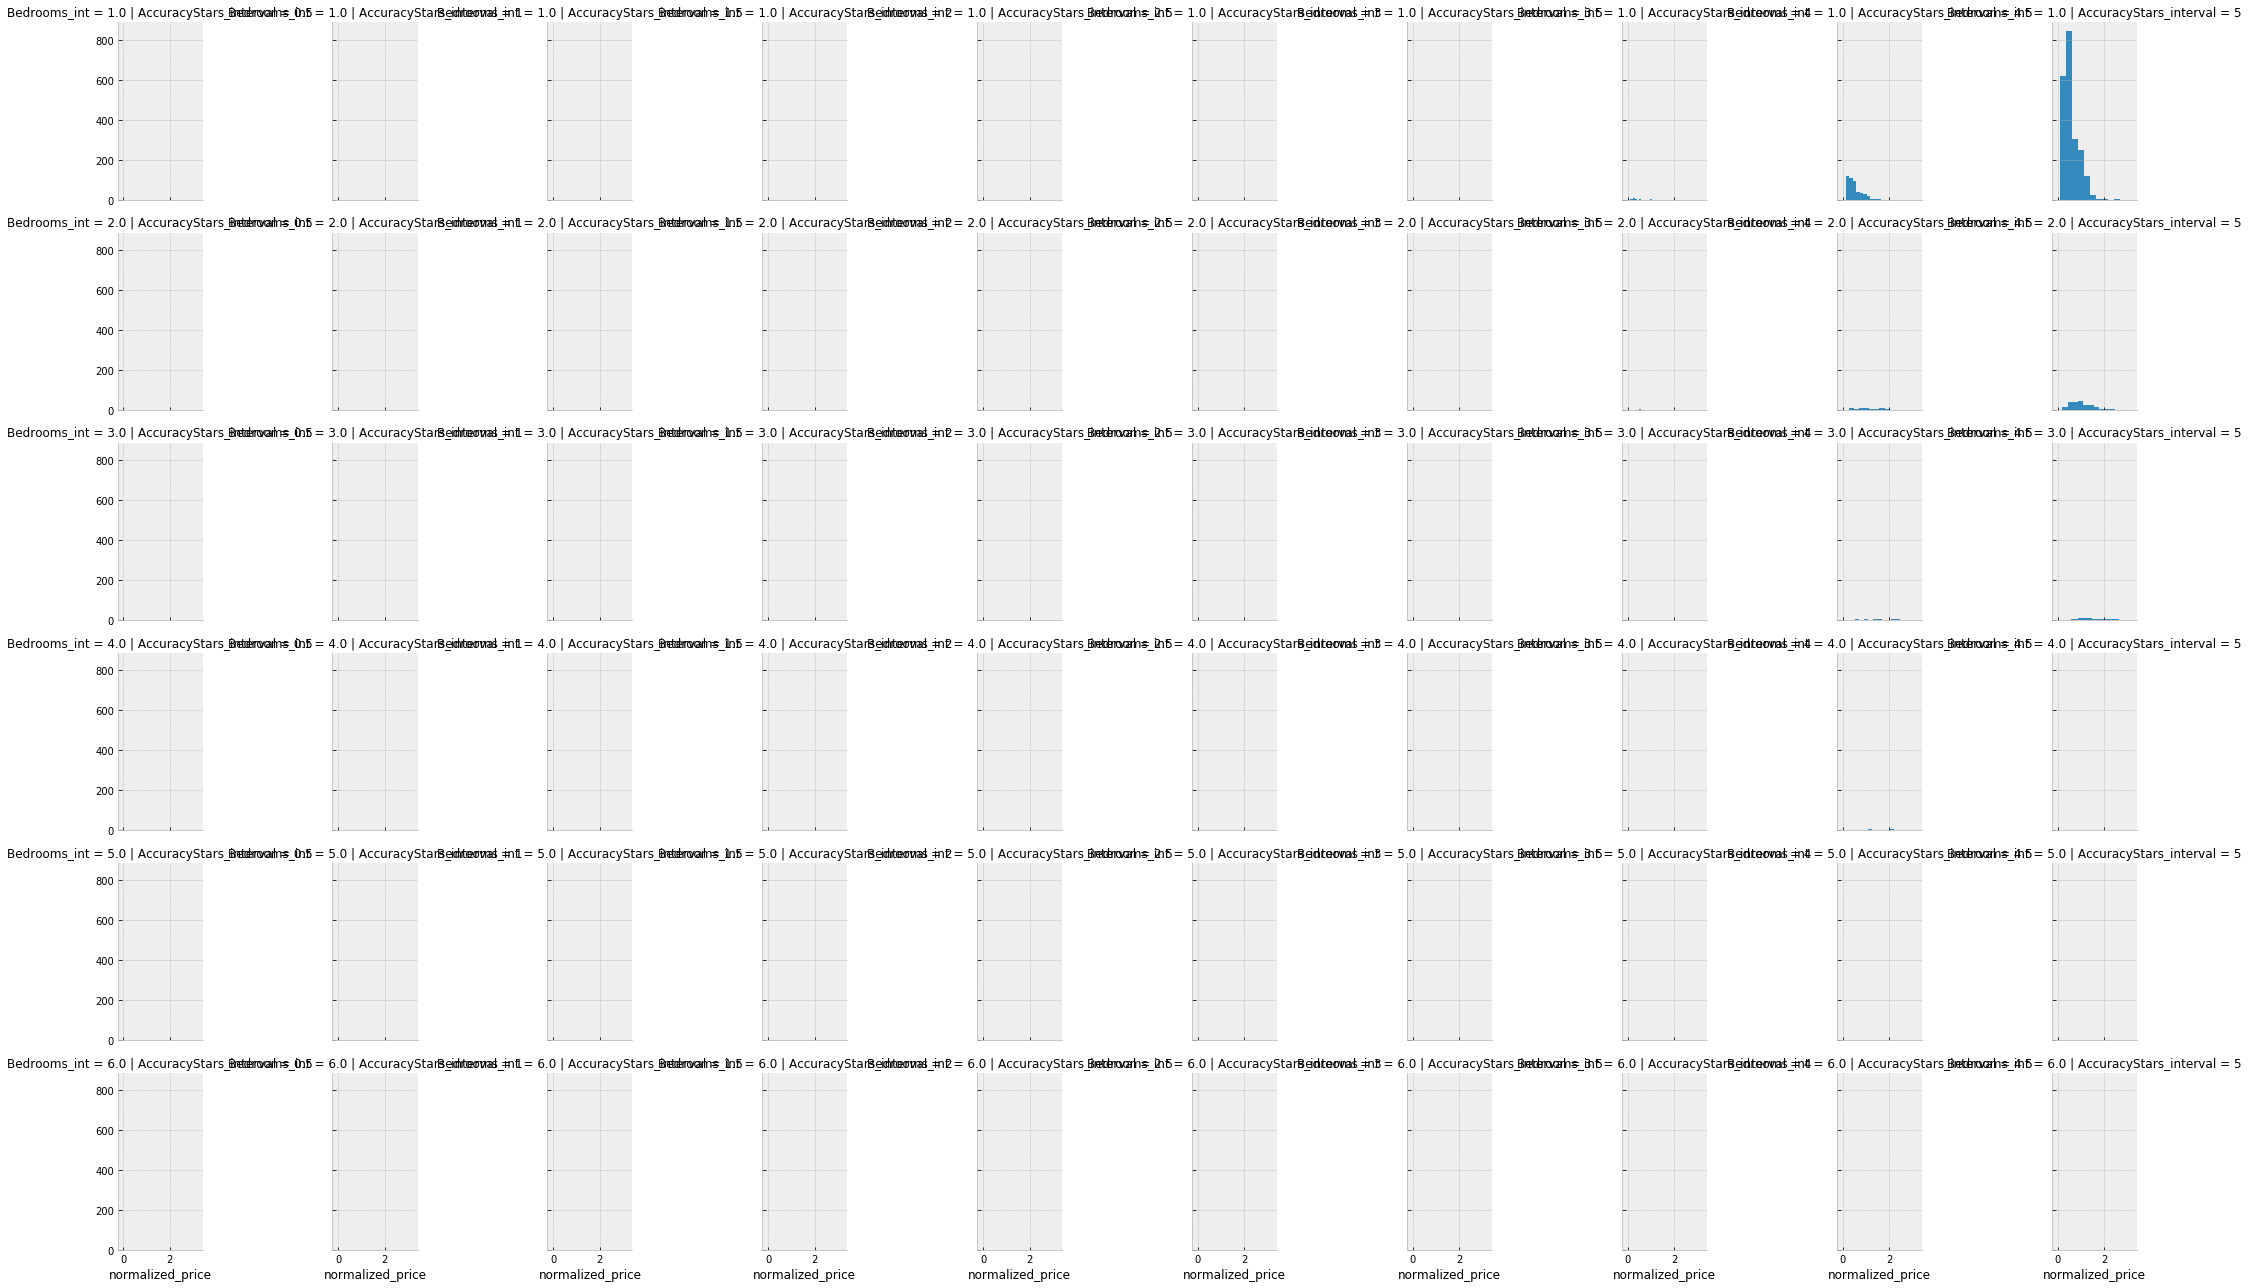

In [139]:
g = sns.FacetGrid(fixed_size_homes_NY, col='AccuracyStars_interval',  row='Bedrooms_int')
g = g.map(plt.hist, "normalized_price")

## Homes with the same physical area

In [141]:
Same_area_homes = NewYorkData

In [142]:
Same_area_homes['Group_ID'] = Same_area_homes.groupby(['Latitude','Longitude']).grouper.group_info[0]

In [143]:
Same_area_homes

index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0      3956             5.0 2020-02-06            5.0 2020-02-11   
1      2961             5.0 2019-08-22            5.0 2019-08-27   
2       924             5.0 2019-09-05            5.0 2019-09-10   
3       930             5.0 2019-09-05            5.0 2019-09-10   
4      2954             5.0 2019-08-22            4.5 2019-08-27   
5       933             4.5 2019-09-05            5.0 2019-09-10   
6      2952             5.0 2019-08-22            4.5 2019-08-27   
7      2949             5.0 2019-08-22            5.0 2019-08-27   
8      2947             5.0 2019-08-22            5.0 2019-08-27   
9       942             5.0 2019-09-05            5.0 2019-09-10   
10     2943             5.0 2019-08-22            5.0 2019-08-27   
11      946             0.0 2019-09-05            0.0 2019-09-10   
12     2971             5.0 2019-08-22            5.0 2019-08-27   
13      953             5.0 2019-09-05            5.0 2019-09-10   
14      957             5.0 2019-09-05            5.0 2019-09-10   
15     2930             5.0 2019-08-22            5.0 2019-08-27   
16     2921             5.0 2019-08-22            5.0 2019-08-27   
17      970             5.0 2019-09-05            5.0 2019-09-10   
18     2918             4.5 2019-08-22            4.5 2019-08-27   
19     2917             5.0 2019-08-22            5.0 2019-08-27   
20      978             5.0 2019-09-05            5.0 2019-09-10   
21     2913             5.0 2019-08-22            5.0 2019-08-27   
22     2910             4.5 2019-08-22            5.0 2019-08-27   
23      983             5.0 2019-09-05            5.0 2019-09-10   
24      991             4.5 2019-09-05            4.5 2019-09-10   
25     2935             5.0 2019-08-22            5.0 2019-08-27   
26     2973             5.0 2019-08-22            5.0 2019-08-27   
27      905             5.0 2019-09-05            5.0 2019-09-10   
28     2982             5.0 2019-08-22            5.0 2019-08-27   
29      825             5.0 2019-08-08            5.0 2019-08-13   
...     ...             ...        ...            ...        ...   
3927   3826             5.0 2020-02-06            4.5 2020-02-11   
3928   3703             5.0 2020-01-09            4.5 2020-01-14   
3929   1817             4.5 2020-01-23            4.5 2020-01-28   
3930   3852             5.0 2020-02-06            5.0 2020-02-11   
3931   3882             5.0 2020-02-06            5.0 2020-02-11   
3932   1937             5.0 2020-02-20            5.0 2020-02-25   
3933   1876             5.0 2020-02-20            5.0 2020-02-25   
3934    526             4.0 2019-06-13            5.0 2019-06-18   
3935   1805             4.5 2020-01-23            5.0 2020-01-28   
3936   3841             5.0 2020-02-06            5.0 2020-02-11   
3937   3222             4.5 2019-10-17            4.5 2019-10-22   
3938   3716             4.5 2020-01-09            4.5 2020-01-14   
3939   3474             5.0 2019-11-14            5.0 2019-11-19   
3940   3718             4.5 2020-01-09            5.0 2020-01-14   
3941    107             5.0 2019-03-21            5.0 2019-03-26   
3942   3440             4.5 2019-11-14            4.5 2019-11-19   
3943   2879             4.5 2019-07-25            4.5 2019-07-30   
3944    829             5.0 2019-08-08            5.0 2019-08-13   
3945   3788             4.5 2020-01-09            4.5 2020-01-14   
3946   2958             4.5 2019-08-22            5.0 2019-08-27   
3947   1064             4.5 2019-10-03            4.5 2019-10-08   
3948   1975             4.5 2020-02-20            5.0 2020-02-25   
3949   1927             5.0 2020-02-20            5.0 2020-02-25   
3950   1720             4.5 2020-01-23            5.0 2020-01-28   
3951   3734             5.0 2020-01-09            5.0 2020-01-14   
3952    927             4.5 2019-09-05            4.5 2019-09-10   
3953   1047             5.0 2019-09-05            5.0 2019-09-

In [144]:

Same_area_homes.sort_index(by =['Group_ID'],inplace = True)

In [145]:
Same_area_homes.reset_index(inplace=True)

In [155]:
Same_area_homes = Same_area_homes.drop_duplicates(keep='last')
Same_area_homes

level_0  index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
0        2699    361             5.0 2019-05-16            5.0 2019-05-21   
1         861   2542             5.0 2019-05-30            5.0 2019-06-04   
2        1810   3669             5.0 2019-12-12            5.0 2019-12-17   
3        2237    562             5.0 2019-06-13            5.0 2019-06-18   
4         657   2516             5.0 2019-05-30            5.0 2019-06-04   
5        1772   2670             5.0 2019-06-27            5.0 2019-07-02   
6        2718    409             5.0 2019-05-16            5.0 2019-05-21   
7         793   2592             5.0 2019-05-30            5.0 2019-06-04   
8         289   2143             4.5 2019-03-07            4.5 2019-03-12   
9        2827    292             4.5 2019-04-18            5.0 2019-04-23   
10        970   2110             5.0 2019-03-07            5.0 2019-03-12   
11       1140   2329             0.0 2019-05-02            0.0 2019-05-07   
12        949   2213             0.0 2019-04-04            0.0 2019-04-09   
13       3731   1207             5.0 2019-10-03            5.0 2019-10-08   
14       2657     77             5.0 2019-03-21            5.0 2019-03-26   
15        954   2217             5.0 2019-04-04            5.0 2019-04-09   
16       1791   2664             5.0 2019-06-27            5.0 2019-07-02   
17       1315   3116             5.0 2019-09-19            5.0 2019-09-24   
18       2948   1496             4.5 2019-11-28            5.0 2019-12-03   
19       3148   1583             4.5 2019-12-26            5.0 2019-12-31   
20       3151   1586             4.5 2019-12-26            5.0 2019-12-31   
21        887   2057             5.0 2019-03-07            5.0 2019-03-12   
22        752   2430             5.0 2019-05-02            5.0 2019-05-07   
23       1827   2702             5.0 2019-06-27            5.0 2019-07-02   
24        677   2502             5.0 2019-05-30            5.0 2019-06-04   
25        450   2549             5.0 2019-05-30            5.0 2019-06-04   
26       1503   3327             5.0 2019-10-17            5.0 2019-10-22   
27       3167   1589             5.0 2019-12-26            5.0 2019-12-31   
28       1683   2742             4.5 2019-06-27            4.5 2019-07-02   
29        640   2492             4.5 2019-05-30            4.5 2019-06-04   
...       ...    ...             ...        ...            ...        ...   
3927     1736   2786             5.0 2019-07-25            5.0 2019-07-30   
3928     2351    770             5.0 2019-08-08            5.0 2019-08-13   
3929     3802    295             5.0 2019-04-18            5.0 2019-04-23   
3930      870   2052             0.0 2019-03-07            0.0 2019-03-12   
3931     1277   2301             5.0 2019-04-04            5.0 2019-04-09   
3932     1041   2158             5.0 2019-03-07            5.0 2019-03-12   
3933     2912   1459             5.0 2019-11-28            5.0 2019-12-03   
3934     1697   3656             5.0 2019-12-12            5.0 2019-12-17   
3935     2631    113             5.0 2019-03-21            5.0 2019-03-26   
3936     3280   1190             5.0 2019-10-03            5.0 2019-10-08   
3937     2316    995             5.0 2019-09-05            5.0 2019-09-10   
3938     1483   3354             5.0 2019-10-17            5.0 2019-10-22   
3939     3577    146             5.0 2019-04-18            5.0 2019-04-23   
3940      913   2584             5.0 2019-05-30            5.0 2019-06-04   
3941     2780    272             5.0 2019-04-18            5.0 2019-04-23   
3942     1259   2100             4.5 2019-03-07            5.0 2019-03-12   
3943     3351   1018             4.5 2019-09-05            4.5 2019-09-10   
3944     3798   2345             0.0 2019-05-02            0.0 2019-05-07   
3945     2800    262             5.0 2019-04-18            5.0 2019-04-23   
3946     3355   2007             5.0 2019-03-07            5.0 2019-03-12   
39

In [152]:
Same_area_homes

AttributeError: 'DataFrame' object has no attribute 'unique'

### Bangkok

In [126]:
BangkokData_corr= BangkokData_num.corr()
BangkokData_corr

Price  Latitude  Longitude  Beds_int  \
Price                       1.000000  0.065769  -0.092433  0.436478   
Latitude                    0.065769  1.000000  -0.185423  0.063465   
Longitude                  -0.092433 -0.185423   1.000000 -0.073556   
Beds_int                    0.436478  0.063465  -0.073556  1.000000   
Bedrooms_int                0.567879  0.006806  -0.067759  0.571012   
Bathrooms_num_int           0.408320  0.019517  -0.065525  0.580281   
shared_room                -0.179574  0.016123   0.048833 -0.074554   
shared_bathroom            -0.149778 -0.042205  -0.023281  0.041484   
Super_host                  0.180583 -0.010558  -0.129979  0.104659   
CheckIn_stars               0.053555  0.034708  -0.043611  0.008165   
Accuracy_stars              0.053265  0.040765  -0.045225  0.003462   
Cleanliness_stars           0.051520  0.037498  -0.046978  0.003772   
Communication_stars         0.051650  0.034863  -0.046649  0.006832   
Location_stars              0.086565  0.028679  -0.037073 -0.002138   
Value_stars                 0.042335  0.029527  -0.045556  0.003587   
Unnamed: 18                -0.003076 -0.006818   0.010848 -0.005669   
Air conditioning            0.020883 -0.017718   0.034468  0.026372   
BBQ grill                   0.061848  0.018813   0.013926 -0.022730   
Baby bath                   0.113540  0.009353   0.028759  0.157530   
Baby monitor                0.040635  0.015210  -0.033752 -0.057688   
Babysitter recommendations  0.016456 -0.004571  -0.020901 -0.015814   
Bathtub                     0.182687  0.021154   0.016403  0.098782   
Beach essentials           -0.008279  0.003895  -0.001124 -0.020733   
Beachfront                  0.008222  0.001980  -0.002028  0.017940   
Bed linens                 -0.002897  0.003256  -0.111152 -0.021213   
Breakfast                   0.095067  0.031959  -0.004275  0.203015   
Building staff             -0.056486  0.097095   0.031841 -0.019323   
Cable TV                    0.061822 -0.071925   0.044987 -0.018090   
Carbon monoxide detector    0.116127  0.053575   0.027059 -0.067137   
Changing table              0.037154 -0.005828  -0.019035 -0.010061   
...                              ...       ...        ...       ...   
Paid parking off premises  -0.064583 -0.007073   0.043619 -0.044197   
Paid parking on premises    0.002551  0.002117  -0.042662 -0.035710   
Patio or balcony            0.072716 -0.021898  -0.044195 -0.049975   
Pocket wifi                 0.017565  0.042044  -0.079752 -0.020442   
Pool                        0.086099 -0.002403   0.100385 -0.204932   
Private entrance            0.024893 -0.101946  -0.043246 -0.009512   
Private living room        -0.064219  0.027270  -0.004749 -0.023874   
Refrigerator                0.007133 -0.038911  -0.043322 -0.058128   
Room-darkening shades       0.038855 -0.060008   0.063037  0.000977   
Shampoo                     0.128550  0.077720  -0.044371  0.005713   
Single level home           0.128472  0.067637  -0.046317  0.013497   
Smart lock                  0.067649 -0.043418  -0.150366  0.004567   
Smoke detector              0.048961 -0.041455   0.019972 -0.115208   
Stair gates                 0.069602  0.011908  -0.025520  0.143365   
Stove                       0.051181 -0.053435  -0.001289 -0.041498   
TV                          0.148507  0.000718   0.114915 -0.047081   
Table corner guards         0.071225  0.035051   0.001534  0.000468   
Washer                     -0.040580 -0.093964   0.034881 -0.106908   
Waterfront                  0.068708  0.031542  -0.066845  0.020991   
Wifi                        0.052369 -0.009649   0.006385  0.039707   
Window guards               0.005908  0.011218  -0.031657 -0.009135   
air                        -0.025132 -0.002491   0.016013 -0.026624   
bunk                       -0.097638  0.002858  -0.077334  0.216737   
couch                      -0.056817 -0.003847  -0.000685 -0.035255   
double                     -0.049804 -0.012737   0.0611

In [127]:
valuable_feats_Bngkok = BangkokData_corr['Price'][abs(BangkokData_corr['Price']) > 0.5]
valuable_feats_Bngkok

Price           1.000000
Bedrooms_int    0.567879
Name: Price, dtype: float64

### Based on Location

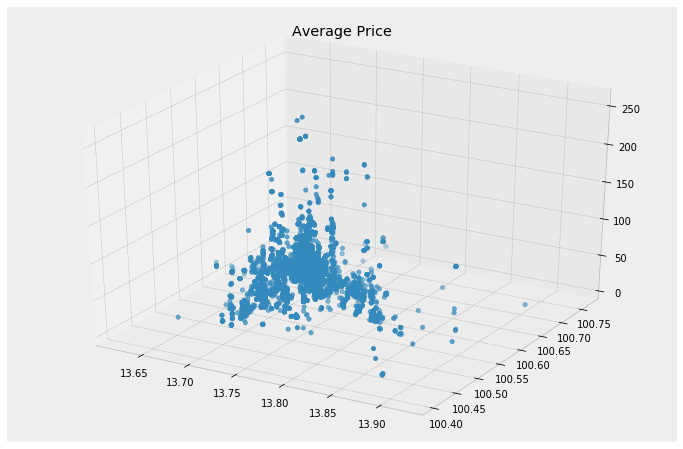

In [49]:
X = BangkokData['Latitude']
Y = BangkokData['Longitude']
Z = BangkokData['Price']

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)
ax.set_title('Average Price')
plt.show()


### Based on Time

In [48]:
AvgPrice_Bngkok = group_by_date(BangkokData) 
#reate a data object
price_data_Bngkok = go.Scatter(x=AvgPrice_Bngkok.index,y=AvgPrice_Bngkok.values)
#set up the plot layout
layout2 = go.Layout(title='Bangkok_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))
# create a figure and display it
fig2 = go.Figure(data=[price_data_Bngkok],layout=layout2)
#display the plot interactively
iplot(fig2)


### Cairo

In [128]:
CairoData_corr=CairoData_num.corr()
CairoData_corr

Price  Latitude  Longitude  Beds_int  \
Price                       1.000000 -0.139900   0.112766  0.155787   
Latitude                   -0.139900  1.000000   0.394063  0.049565   
Longitude                   0.112766  0.394063   1.000000 -0.066287   
Beds_int                    0.155787  0.049565  -0.066287  1.000000   
Bedrooms_int                0.180418 -0.001073  -0.104167  0.727412   
Bathrooms_num_int           0.174348 -0.025501  -0.075311  0.609294   
shared_room                -0.415663  0.041747  -0.337510 -0.091055   
shared_bathroom            -0.326417 -0.001175  -0.110541 -0.178185   
Super_host                  0.016063 -0.027620   0.007716 -0.057666   
CheckIn_stars              -0.028501 -0.026943  -0.121476  0.032259   
Accuracy_stars             -0.025663 -0.024076  -0.115624  0.034585   
Cleanliness_stars          -0.012997 -0.026317  -0.112679  0.029952   
Communication_stars        -0.028073 -0.027032  -0.122557  0.032103   
Location_stars             -0.031733 -0.017725  -0.131568  0.032978   
Value_stars                -0.032676 -0.026853  -0.116640  0.031217   
Unnamed: 18                 0.023121  0.002619   0.001978 -0.000433   
Air conditioning            0.178371 -0.051445   0.010312 -0.028348   
BBQ grill                   0.012848 -0.059263   0.052119 -0.015034   
Baby bath                  -0.002331  0.022531  -0.012367  0.009304   
Baby monitor                0.038610  0.054613   0.086647 -0.035572   
Babysitter recommendations  0.074764  0.014135   0.007294  0.012075   
Bathtub                     0.073757 -0.104757  -0.032399  0.042887   
Beach essentials            0.098820  0.080704   0.110617 -0.023009   
Beachfront                  0.051930  0.009131  -0.048378  0.006685   
Bed linens                 -0.005847 -0.094751  -0.010497 -0.059778   
Breakfast                  -0.120305  0.009740  -0.236200  0.013069   
Building staff             -0.031220 -0.061523  -0.131025  0.104140   
Cable TV                    0.098999 -0.025048   0.064834  0.046234   
Carbon monoxide detector    0.056597  0.004251  -0.072230  0.009467   
Changing table              0.006064  0.056042   0.029649  0.012192   
...                              ...       ...        ...       ...   
Paid parking on premises   -0.073048 -0.022193  -0.147693  0.002512   
Patio or balcony            0.009931 -0.074263   0.097088  0.001119   
Pocket wifi                 0.059289 -0.038821  -0.009449  0.026820   
Pool                        0.221303  0.048420   0.088206 -0.020098   
Private entrance            0.045673 -0.027471  -0.015609  0.025533   
Private living room        -0.145245 -0.024005  -0.189745 -0.013973   
Refrigerator               -0.044680 -0.067992  -0.003160 -0.044413   
Room-darkening shades       0.059319  0.037462  -0.001583  0.042021   
Shampoo                     0.006104 -0.089560  -0.016651 -0.023265   
Single level home          -0.017859 -0.011715  -0.019347  0.001667   
Ski-in/Ski-out             -0.022526  0.014413  -0.068163  0.012217   
Smart lock                  0.012247  0.023846  -0.015302  0.018420   
Smoke detector              0.113201  0.016990  -0.091112  0.020687   
Stair gates                 0.020704  0.030424  -0.026554  0.057665   
Stove                      -0.009481 -0.095999   0.012436 -0.041279   
TV                          0.185432 -0.071691   0.120876  0.084811   
Table corner guards        -0.047306 -0.077906  -0.036218 -0.011781   
Washer                     -0.001893 -0.024543   0.002209  0.017826   
Waterfront                  0.055228 -0.099508  -0.022186  0.031713   
Wifi                       -0.074804 -0.118141  -0.198548  0.013213   
Window guards               0.035398  0.026433  -0.000793  0.050084   
air                        -0.006305  0.027367   0.009769 -0.002637   
bunk                       -0.067717  0.055924  -0.030957  0.038564   
couch                      -0.051518  0.029144   0.067719 -0.032567   
double                     -0.020637  0.025720  -0.0014

In [129]:
valuable_feats_Cairo = CairoData_corr['Price'][abs(CairoData_corr['Price']) > 0.5]
valuable_feats_Cairo

Price    1.0
Name: Price, dtype: float64

### Based on Location

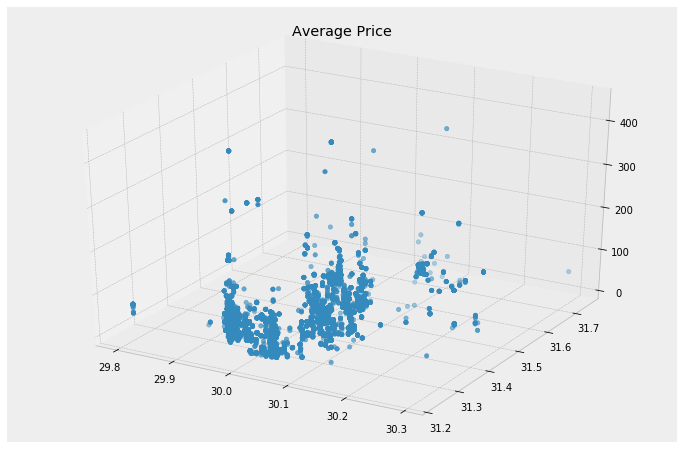

In [52]:
X = CairoData['Latitude']
Y = CairoData['Longitude']
Z = CairoData['Price']

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)
ax.set_title('Average Price')
plt.show()



### Based on Time

In [51]:
AvgPrice_Cairo = group_by_date(CairoData)
#reate a data object
price_data_Cairo = go.Scatter(x=AvgPrice_Cairo.index,y=AvgPrice_Cairo.values)

#set up the plot layout
layout3 = go.Layout(title='Cairo_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))

# create a figure and display it
fig3 = go.Figure(data=[price_data_Cairo],layout=layout3)

#display the plot interactively
iplot(fig3)


surprisingly,with those exploratory plots for the average price,we can see a pretty strong trend for them increasing with time for the three cities. So it looks like as we book later, we can get cheaper deals for renting a house/apartment no matter the month of the year!!  

## Number of Bedrooms, Beds, Bathrooms

### Bangkok

In [141]:
group1_data_Bangkok =  BangkokData_num[['Price','Beds_int', 'Bedrooms_int','Bathrooms_num_int']]

In [142]:
group1_data_Bangkok.corr()['Price']

Price                1.000000
Beds_int             0.436478
Bedrooms_int         0.567879
Bathrooms_num_int    0.408320
Name: Price, dtype: float64

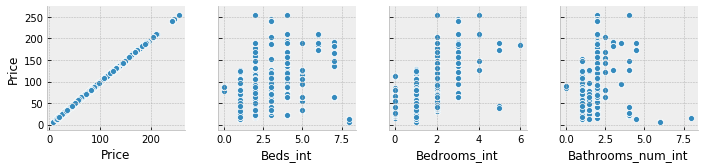

In [143]:
sns.pairplot(data=group1_data_Bangkok,x_vars=group1_data_Bangkok .columns,y_vars=['Price'])

### Cairo

In [144]:
group1_data_cairo =  CairoData_num[['Price','Beds_int', 'Bedrooms_int','Bathrooms_num_int']]

In [145]:
group1_data_cairo.corr()['Price']

Price                1.000000
Beds_int             0.155787
Bedrooms_int         0.180418
Bathrooms_num_int    0.174348
Name: Price, dtype: float64

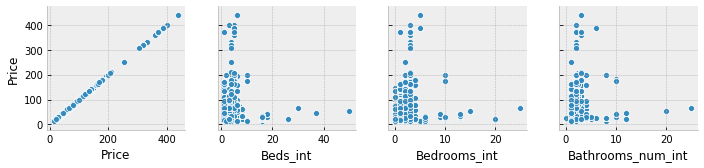

In [146]:
sns.pairplot(data= group1_data_cairo,x_vars= group1_data_cairo.columns,y_vars=['Price'])

# Categorical Features

## which kind of amenities can increase the renting price?! 

### Bangkok

In [190]:
Amenities_list_Bangkok = BangkokData.columns[18:-9]
Amenities_Bangkok = BangkokData[Amenities_list_Bangkok]
Amenities_Bangkok['Price']= BangkokData['Price']
Amenities_Bangkok.head()

Air conditioning  BBQ grill  Baby bath  Baby monitor  \
0                 1          0          0             0   
1                 1          0          0             0   
2                 1          0          0             0   
3                 1          0          0             0   
4                 1          0          0             0   

   Babysitter recommendations  Bathtub  Beach essentials  Beachfront  \
0                           0        0                 0           0   
1                           0        0                 0           0   
2                           0        0                 0           0   
3                           0        0                 0           0   
4                           0        0                 0           0   

   Bed linens  Breakfast  ...    Smoke detector  Stair gates  Stove  TV  \
0           0          0  ...                 1            0      1   1   
1           0          0  ...                 1            0      0   1   
2           1          0  ...                 1            0      0   1   
3           1          1  ...                 1            0      1   1   
4           0          0  ...                 0            0      0   1   

   Table corner guards  Washer  Waterfront  Wifi  Window guards  Price  
0                    0       1           0     1              0   34.0  
1                    0       1           0     1              0   48.0  
2                    0       1           0     1              0   27.0  
3                    0       1           0     1              1   35.0  
4                    0       1           0     1              0   34.0  

[5 rows x 79 columns]

In [191]:
Amenities_Bangkok.corr()['Price']

Air conditioning              0.020883
BBQ grill                     0.061848
Baby bath                     0.113540
Baby monitor                  0.040635
Babysitter recommendations    0.016456
Bathtub                       0.182687
Beach essentials             -0.008279
Beachfront                    0.008222
Bed linens                   -0.002897
Breakfast                     0.095067
Building staff               -0.056486
Cable TV                      0.061822
Carbon monoxide detector      0.116127
Changing table                0.037154
Children’s books and toys     0.115129
Children’s dinnerware         0.021363
Cleaning before checkout     -0.006749
Coffee maker                  0.086583
Cooking basics                0.121277
Crib                          0.317308
Dishes and silverware         0.031455
Dishwasher                    0.081724
Dryer                        -0.075695
EV charger                    0.045482
Elevator                      0.024509
Essentials               

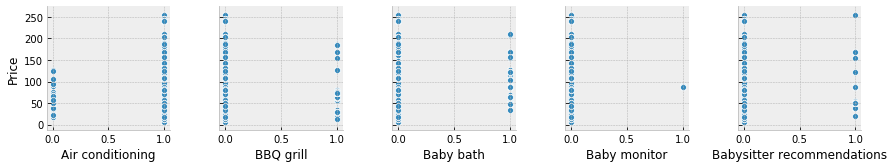

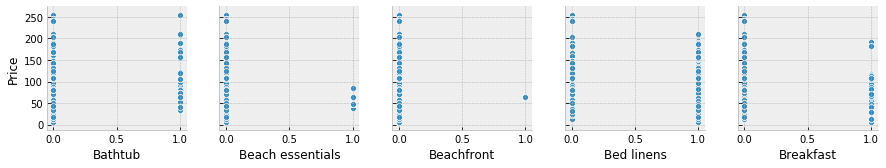

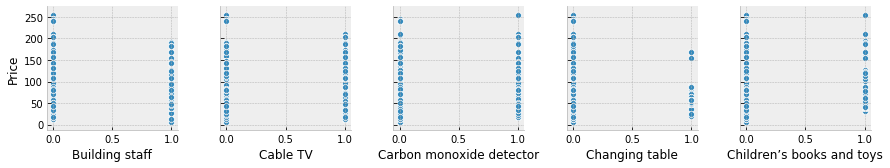

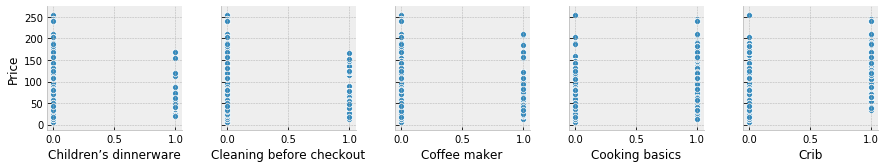

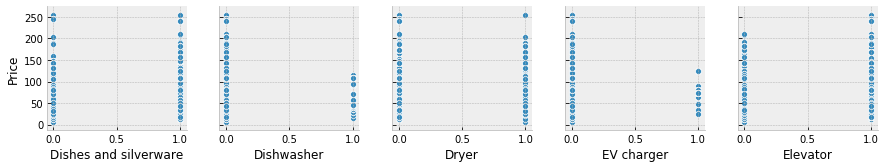

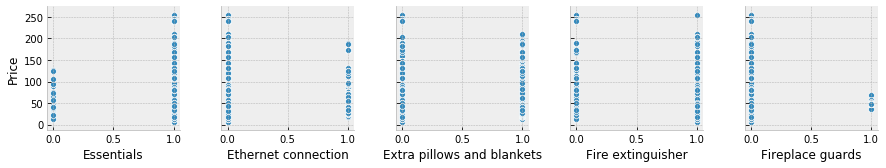

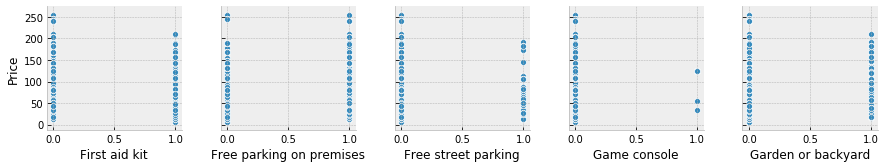

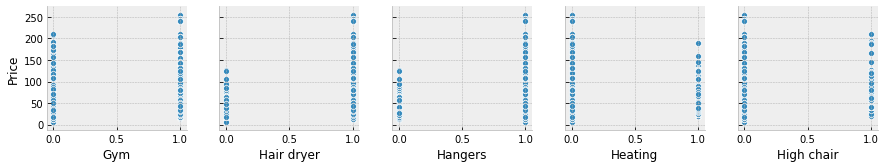

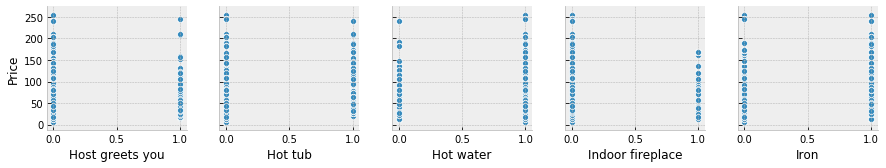

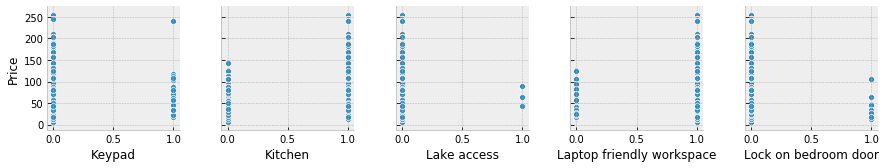

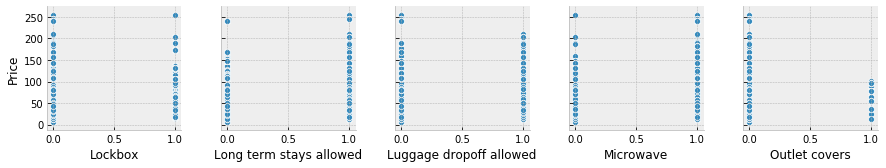

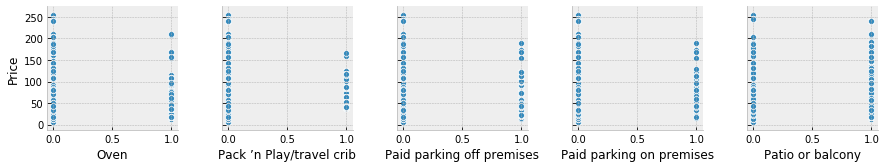

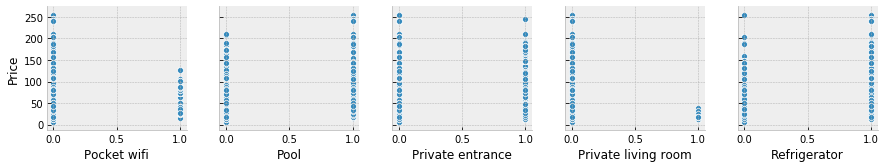

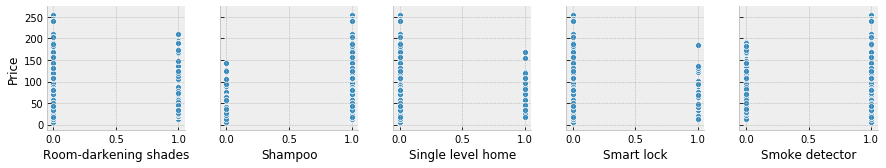

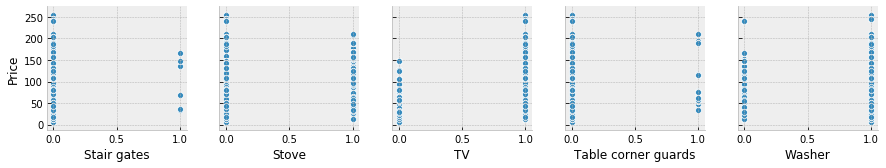

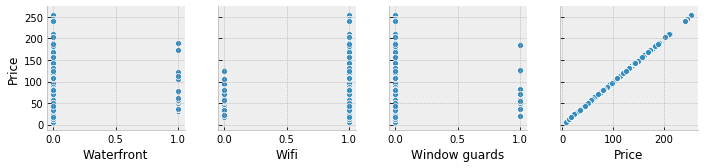

In [192]:
for i in range(0, len(Amenities_Bangkok.columns), 5):
    sns.pairplot(data=Amenities_Bangkok,x_vars=Amenities_Bangkok.columns[i:i+5],y_vars=['Price'])

### Cairo

In [205]:
Amenities_list_Cairo = CairoData.columns[18:-9]
Amenities_list_Cairo

Index(['Air conditioning', 'BBQ grill', 'Baby bath', 'Baby monitor',
       'Babysitter recommendations', 'Bathtub', 'Beach essentials',
       'Beachfront', 'Bed linens', 'Breakfast', 'Building staff', 'Cable TV',
       'Carbon monoxide detector', 'Changing table',
       'Children’s books and toys', 'Children’s dinnerware',
       'Cleaning before checkout', 'Coffee maker', 'Cooking basics', 'Crib',
       'Dishes and silverware', 'Dishwasher', 'Dryer', 'EV charger',
       'Elevator', 'Essentials', 'Ethernet connection',
       'Extra pillows and blankets', 'Fire extinguisher', 'Fireplace guards',
       'First aid kit', 'Free parking on premises', 'Free street parking',
       'Game console', 'Garden or backyard', 'Gym', 'Hair dryer', 'Hangers',
       'Heating', 'High chair', 'Host greets you', 'Hot tub', 'Hot water',
       'Indoor fireplace', 'Iron', 'Keypad', 'Kitchen', 'Lake access',
       'Laptop friendly workspace', 'Lock on bedroom door', 'Lockbox',
       'Long term stay

In [206]:
Amenities_Cairo = CairoData_num[Amenities_list_NY]
Amenities_Cairo['Price']= CairoData['Price']
Amenities_Cairo.head()

Air conditioning  BBQ grill  Baby bath  Baby monitor  \
0                 1          0          0             0   
1                 0          0          0             0   
2                 1          0          0             0   
3                 1          0          0             0   
4                 1          0          0             0   

   Babysitter recommendations  Bathtub  Beach essentials  Beachfront  \
0                           0        0                 0           0   
1                           0        1                 0           0   
2                           1        0                 0           0   
3                           0        0                 0           0   
4                           0        0                 0           0   

   Bed linens  Breakfast  ...    Smoke detector  Stair gates  Stove  TV  \
0           0          1  ...                 1            0      0   1   
1           0          0  ...                 0            0      1   1   
2           1          1  ...                 0            0      0   1   
3           0          0  ...                 1            0      0   1   
4           1          0  ...                 0            0      1   1   

   Table corner guards  Washer  Waterfront  Wifi  Window guards  Price  
0                    0       1           0     1              0   15.0  
1                    0       1           0     1              1   12.0  
2                    0       1           0     1              0   22.0  
3                    0       1           0     1              0   19.0  
4                    0       1           0     1              0   23.0  

[5 rows x 80 columns]

In [207]:
Amenities_Cairo.corr()['Price']

Air conditioning              0.178371
BBQ grill                     0.012848
Baby bath                    -0.002331
Baby monitor                  0.038610
Babysitter recommendations    0.074764
Bathtub                       0.073757
Beach essentials              0.098820
Beachfront                    0.051930
Bed linens                   -0.005847
Breakfast                    -0.120305
Building staff               -0.031220
Cable TV                      0.098999
Carbon monoxide detector      0.056597
Changing table                0.006064
Children’s books and toys     0.033621
Children’s dinnerware         0.133335
Cleaning before checkout     -0.064979
Coffee maker                 -0.009043
Cooking basics               -0.037265
Crib                          0.010958
Dishes and silverware        -0.019615
Dishwasher                    0.115372
Dryer                        -0.015118
EV charger                    0.098820
Elevator                      0.027888
Essentials               

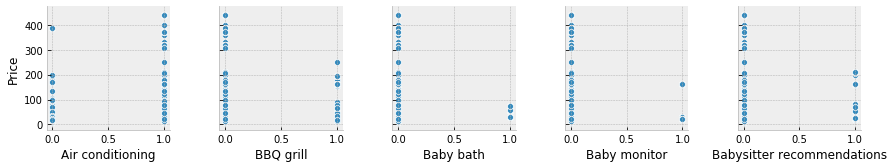

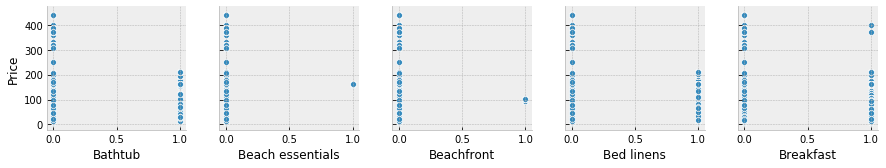

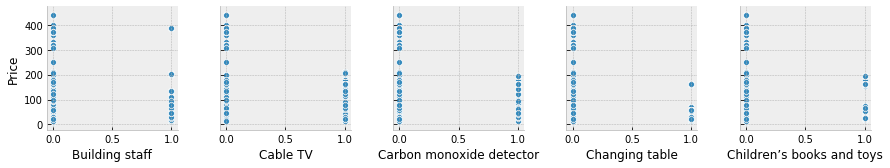

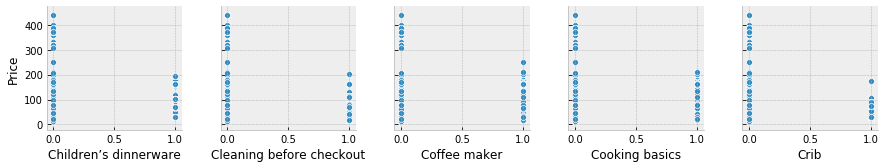

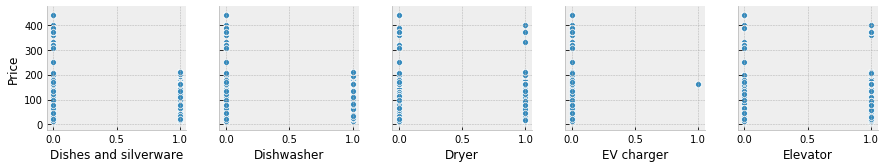

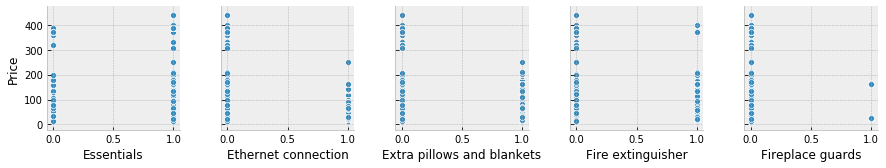

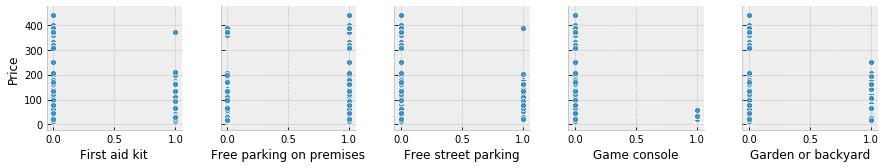

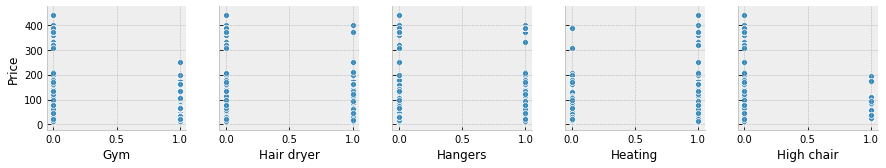

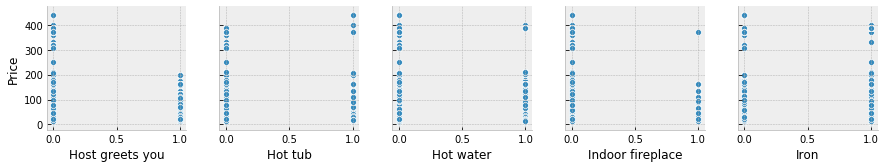

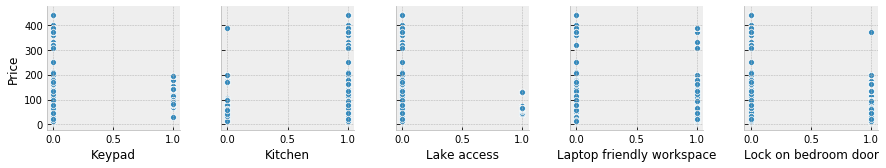

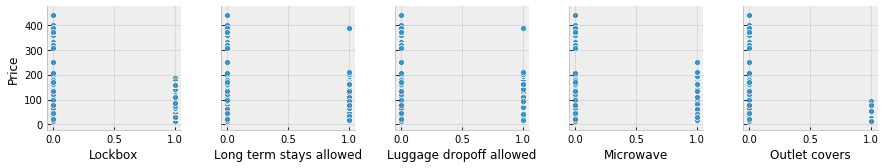

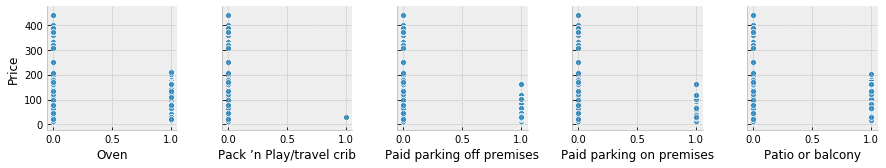

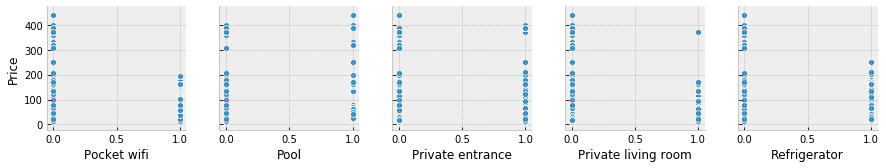

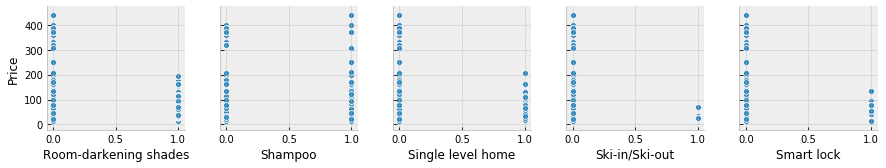

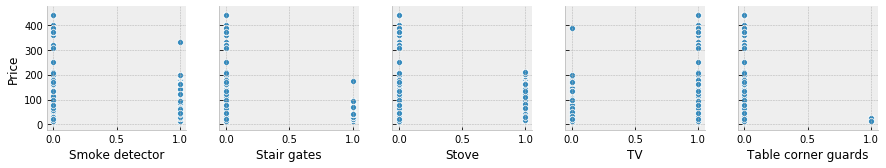

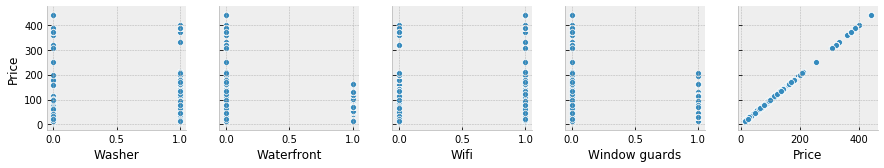

In [208]:
for i in range(0, len(Amenities_Cairo.columns), 5):
    sns.pairplot(data=Amenities_Cairo,x_vars=Amenities_Cairo.columns[i:i+5],y_vars=['Price'])

## Can the bed type affect the corresponding renting price

### Bangkok

In [159]:
BangkokData.columns

Index(['Price', 'CheckIn', 'CheckOut', 'Latitude', 'Longitude', 'Beds_int',
       'Bedrooms_int', 'Bathrooms_num_int', 'shared_room', 'shared_bathroom',
       ...
       'Window guards', 'air', 'bunk', 'couch', 'double', 'floor', 'king',
       'queen', 'single', 'sofa'],
      dtype='object', length=105)

In [161]:
bed_data_Bangkok = BangkokData[['Price','air', 'bunk', 'couch', 'double', 'floor', 'king','queen', 'single', 'sofa']]

In [162]:
bed_data_Bangkok.corr()['Price']

Price     1.000000
air      -0.025132
bunk     -0.097638
couch    -0.056817
double   -0.049804
floor    -0.053945
king      0.287205
queen    -0.111464
single   -0.099705
sofa     -0.064032
Name: Price, dtype: float64

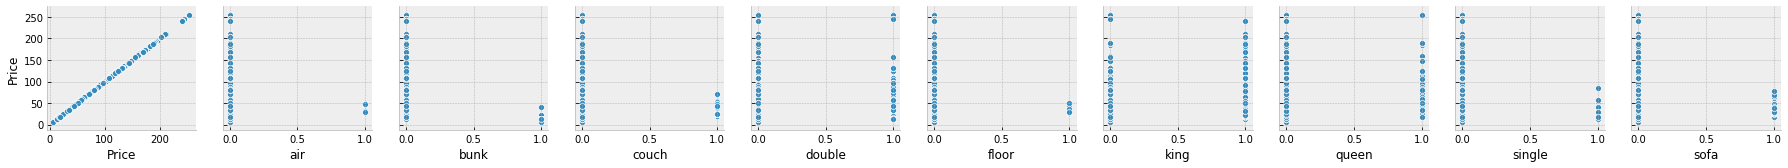

In [163]:
sns.pairplot(data= bed_data_Bangkok,x_vars=bed_data_Bangkok.columns,y_vars=['Price'])

### Cairo

In [165]:
CairoData.columns

Index(['Price', 'CheckIn', 'CheckOut', 'Latitude', 'Longitude', 'Beds_int',
       'Bedrooms_int', 'Bathrooms_num_int', 'shared_room', 'shared_bathroom',
       ...
       'Window guards', 'air', 'bunk', 'couch', 'double', 'floor', 'king',
       'queen', 'single', 'sofa'],
      dtype='object', length=106)

In [166]:
bed_data_Cairo = CairoData[['Price','air', 'bunk', 'couch', 'double', 'floor', 'king','queen', 'single', 'sofa']]

In [167]:
bed_data_Cairo.corr()['Price']

Price     1.000000
air      -0.006305
bunk     -0.067717
couch    -0.051518
double   -0.020637
floor    -0.018169
king      0.167372
queen     0.123536
single   -0.144145
sofa      0.005020
Name: Price, dtype: float64

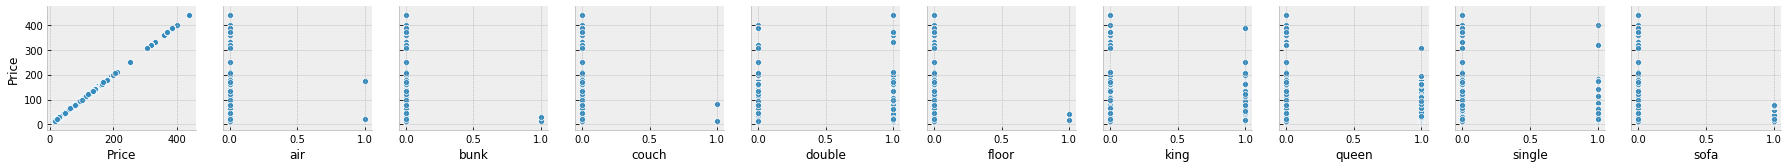

In [168]:
sns.pairplot(data= bed_data_Cairo,x_vars=bed_data_Cairo.columns,y_vars=['Price'])

For the three cities,it looks like we have higher renting prices having special kinds of beds such as "double", "single","king", and "queen" than with other types of beds!

## What is about the number of review stars?!

In [214]:
ReviewStarsNY_List = NewYorkData.columns[11:17]
ReviewStarsNY_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [219]:
ReviewStarsNY = NewYorkData_num[ReviewStarsNY_List]
ReviewStarsNY['Price'] = NewYorkData_num['Price']
ReviewStarsNY.head()

CheckIn_stars  Accuracy_stars  Cleanliness_stars  Communication_stars  \
0            5.0             5.0                5.0                  5.0   
1            4.5             4.5                4.0                  4.5   
2            5.0             5.0                5.0                  5.0   
3            5.0             5.0                5.0                  5.0   
4            5.0             5.0                5.0                  5.0   

   Location_stars  Value_stars  Price  
0             5.0          4.5  244.0  
1             5.0          4.0   62.0  
2             4.5          5.0   44.0  
3             5.0          5.0   78.0  
4             4.5          5.0   80.0

In [220]:
ReviewStarsNY.corr()['Price']


CheckIn_stars          0.010759
Accuracy_stars         0.024116
Cleanliness_stars      0.040625
Communication_stars    0.023310
Location_stars         0.072164
Value_stars            0.003400
Price                  1.000000
Name: Price, dtype: float64

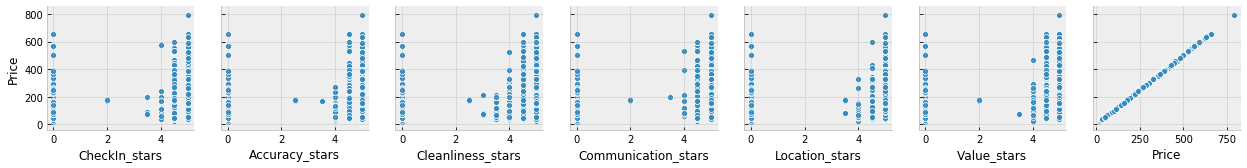

In [221]:
sns.pairplot(data= ReviewStarsNY,x_vars= ReviewStarsNY.columns,y_vars=['Price'])

### Bangkok

In [222]:
ReviewStarsBangkok_List = BangkokData.columns[11:17]
ReviewStarsBangkok_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [223]:
ReviewStarsBangkok = BangkokData[ReviewStarsBangkok_List]
ReviewStarsBangkok['Price'] = BangkokData['Price']
ReviewStarsBangkok.head()

CheckIn_stars  Accuracy_stars  Cleanliness_stars  Communication_stars  \
0            5.0             5.0                4.5                  5.0   
1            0.0             0.0                0.0                  0.0   
2            5.0             5.0                5.0                  5.0   
3            5.0             5.0                4.5                  5.0   
4            0.0             0.0                0.0                  0.0   

   Location_stars  Value_stars  Price  
0             5.0          5.0   34.0  
1             0.0          0.0   48.0  
2             4.0          4.5   27.0  
3             5.0          5.0   35.0  
4             0.0          0.0   34.0

In [224]:
ReviewStarsBangkok.corr()['Price']


CheckIn_stars          0.053555
Accuracy_stars         0.053265
Cleanliness_stars      0.051520
Communication_stars    0.051650
Location_stars         0.086565
Value_stars            0.042335
Price                  1.000000
Name: Price, dtype: float64

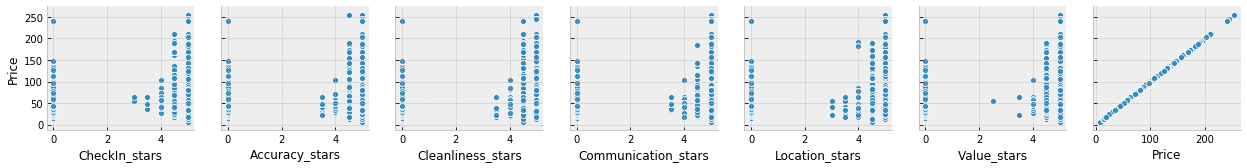

In [225]:
sns.pairplot(data= ReviewStarsBangkok,x_vars= ReviewStarsBangkok.columns,y_vars=['Price'])

### Cairo

In [226]:
ReviewStarsCairo_List = CairoData.columns[11:17]
ReviewStarsCairo_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [227]:
ReviewStarsCairo = CairoData[ReviewStarsCairo_List]
ReviewStarsCairo['Price'] = CairoData['Price']
ReviewStarsCairo.head()

CheckIn_stars  Accuracy_stars  Cleanliness_stars  Communication_stars  \
0            0.0             0.0                0.0                  0.0   
1            0.0             0.0                0.0                  0.0   
2            5.0             4.0                3.5                  5.0   
3            5.0             5.0                5.0                  5.0   
4            0.0             0.0                0.0                  0.0   

   Location_stars  Value_stars  Price  
0             0.0          0.0   15.0  
1             0.0          0.0   12.0  
2             4.5          4.0   22.0  
3             5.0          5.0   19.0  
4             0.0          0.0   23.0

In [228]:
ReviewStarsCairo.corr()['Price']

CheckIn_stars         -0.028501
Accuracy_stars        -0.025663
Cleanliness_stars     -0.012997
Communication_stars   -0.028073
Location_stars        -0.031733
Value_stars           -0.032676
Price                  1.000000
Name: Price, dtype: float64

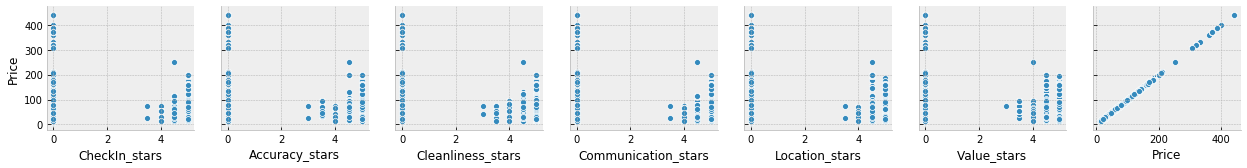

In [229]:
sns.pairplot(data= ReviewStarsCairo,x_vars= ReviewStarsCairo.columns,y_vars=['Price'])

### Rest of Features

In [250]:
# Shared_room has 3 levels
## Entire house/apartment = 0
## Shared room = 1
## Private room = 2

### NewYork

In [234]:
NY_rest = NewYorkData[['shared_room', 'shared_bathroom', 'Super_host']]
NY_rest['Price']= NewYorkData['Price']
NY_rest.head()

shared_room  shared_bathroom  Super_host  Price
0            0                0           1  244.0
1            2                1           1   62.0
2            2                1           1   44.0
3            2                1           1   78.0
4            2                1           1   80.0

In [251]:
NY_rest.corr()['Price']

shared_room       -0.633473
shared_bathroom   -0.511981
Super_host         0.084713
Price              1.000000
Name: Price, dtype: float64

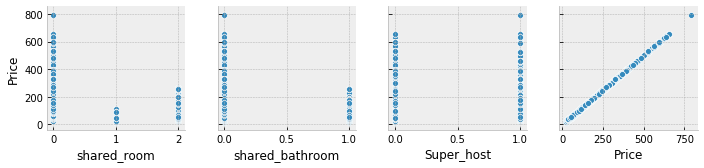

In [252]:
sns.pairplot(data= NY_rest,x_vars= NY_rest.columns,y_vars=['Price'])

### Bangkok

In [235]:
Bangkok_rest = BangkokData[['shared_room', 'shared_bathroom', 'Super_host']]
Bangkok_rest['Price']= BangkokData['Price']
Bangkok_rest.head()

shared_room  shared_bathroom  Super_host  Price
0          0.0                0           1   34.0
1          0.0                0           0   48.0
2          0.0                0           1   27.0
3          0.0                0           0   35.0
4          0.0                0           1   34.0

In [253]:
Bangkok_rest.corr()['Price']

shared_room       -0.179574
shared_bathroom   -0.149778
Super_host         0.180583
Price              1.000000
Name: Price, dtype: float64

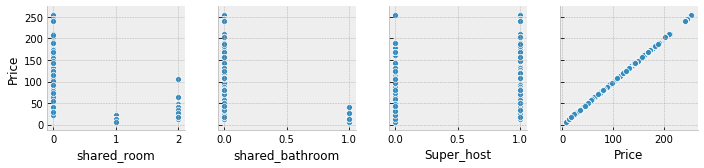

In [254]:
sns.pairplot(data= Bangkok_rest,x_vars= Bangkok_rest.columns,y_vars=['Price'])

### Cairo

In [236]:
Cairo_rest = CairoData[['shared_room', 'shared_bathroom', 'Super_host']]
Cairo_rest['Price']= CairoData['Price']
Cairo_rest.head()

shared_room  shared_bathroom  Super_host  Price
0            2                1           0   15.0
1            0                0           0   12.0
2            2                1           0   22.0
3            2                0           0   19.0
4            2                1           0   23.0

In [255]:
Cairo_rest.corr()['Price']

shared_room       -0.415663
shared_bathroom   -0.326417
Super_host         0.016063
Price              1.000000
Name: Price, dtype: float64

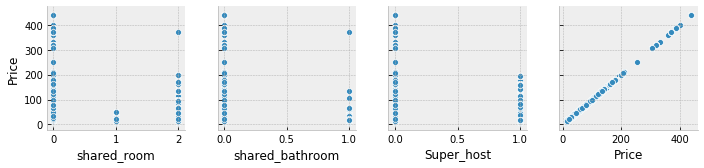

In [256]:
sns.pairplot(data= Cairo_rest,x_vars= Cairo_rest.columns,y_vars=['Price'])